# Table of Contents


[1. Data Preparation and Exploratory Data Analysis](#dp)  
 - [1.1 About Data](#about_data)
 - [1.2 Data Cleaning](#data_cleaning)
 - [1.3 Exploratory Data Analysis](#eda)
    
[2. Data Preprocessing](#data_preprocessing)  
 - [2.1 Bag of Words For Negative Reviews](#bag_negative)  
 - [2.2 Bag of Words For Positive Reviews](#bag_positive)
 - [2.3 Combine Numeric and Vectorized Features](#combine_1)
 
[3. Modelling With Logistic Classifier](#modelling_logistic)  
 - [3.1 Initial Predcition of Positive Reviews](#initial_positive_1)  
 - [3.2 Initial Prediction of Negative Reviews](#initial_negative_1)
 - [3.3 Model Optimization](#optimize_1)
 - [3.4 Fitting With Optimized Hyperparameters](#optimize_fitting_1)
 - [3.5 Conclusion](#conclusion_1)

[4. Modelling With Logistic Classifier](#modelling_decision)
 - [4.1 Initial Predcition of Positive Reviews](#initial_positive_2)  
 - [4.2 Model Optimization](#optimize_2)
 - [4.3 Fitting With Optimized Hyperparameters](#optimize_fitting_2)
 - [4.4 Conclusion](#conclusion_2)

[5. Detailed Evaluation of Logistic Classifier Model](#detailed_evaluation)  
 - [5.1 Precision and Recall](#precision_recall)  
 - [5.2 True Positive Rate, False Positive Rate, and ROC](#tpr_fpr)
   
[6. Conclusion and Recommendations](#recommendations) 

## 1. Data Preparation and Exploratory Data Analysis <a name="dp"></a>

First, we will make sure that our dataset is clean and fit for purpose. We will then explore the data to build initial intuition about the trends that could help answer further questions or guide other downstream tasks such as modeling.

### 1.1 About Data <a name="about_data"></a>

#### Dataset
We will be using a real world hotel reviews dataset to better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. We will also examine what qualities of a hotel stay contribute to negative reivews, so management can take actions for improvement.

The dataset contains information about customers reviews (text fields for positive and negative comments) and details about the stay (hotel location, time & length of stay, etc).

#### Data Dictionary

To help us with our analysis, we will build the data dictionary below.

**Fields about Scoring:**

- Additional_Number_of_Scoring (numeric)
- Average_Score (numeric)

**Fields About Reviews:**
- Negative Review (object)
- Review_Total_Negative_Word_Counts (numeric)
- Positive Review (object)
- Review_Total_Positive_Word_Counts (numeric)
- Total_Number_of_Reviews_Reviewer_Has_Given (numeric)
- Days Since Review (numeric)
- Day (numeric)
- Month (numeric)
- Year (numeric)

**Fields About Reivewer:**
- Reviewer_Score (numeric)- Reviewer_Score (numeric)
- Reviewer_Nationality (object, but was convereted to numeric)- Reviewer_Nationality (object, but was convereted to numeric)
- Total_Number_of_Reviews_Reviewer_Has_Given (numeric)- Total_Number_of_Reviews_Reviewer_Has_Given (numeric)

**Fields about Hotel:**
- Latitude (numeric)
- Longitude (numeric)
- Hotel_Address (object, but was converted to numeric)
- Total_Number_of_Reviews (numeric)

**Fields About Trip:**
- Leisure trip (numeric)
- Nights stayed (numeric)

#### Question of interest
Our target column of interest is `Reviewer_Score` that encodes positive sentiment as **1** and negative as **0**. The main question is what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. We will also look at the qualities of hotel stay that contribute to negative reviews.

#### Plan of Attack:
- Initial data cleaning (looking for missing data, duplicate data, other anomalies)
- Data preprocessing (is everything in the right format?)
- Exploratory analysis (looking at the variables)
- Draw insights
- Formulate a conclusion / recommendation

### 1.2 Data Cleaning <a name="data_cleaning"> </a>

The hotel has provided us with this snapshot of customer review data. First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [1]:
# Holy quadranity of datascience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's read in the data
hotel_df = pd.read_csv('dataset/Hotel_Reviews.csv')

Having read in the data, let's take a look:

In [3]:
# Check
hotel_df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


In [4]:
# How much data are we working with here?
print(hotel_df.shape)

(515738, 30)


In [5]:
print(f'Our dataframe has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.')

Our dataframe has 515738 rows and 30 columns.


We have **515,738** rows of **30 different variables** that were provided. There do not appear to be a unique identifier for review, reviewer, and hotel.

Next steps:

1. Check datatypes and formats
2. Check for duplicate data
3. Check for missing data

#### A. Check datatypes and formats

First we will investigate the structure and format of the data to make sure that nothing is a miss.

In [6]:
hotel_df.head(3)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3


We will drop the feature 'Unnamed' since its values correspond to the indices that we already have.

In [7]:
hotel_df.columns

Index(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Average_Score',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [8]:
hotel_df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
# check that it's dropeed
hotel_df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


We see a variety of numerical (int/float) and non-numeric columns. Furthermore:

In [10]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

We see there are a mixture of numeric and non-numeric columns. "Object" type features correspond to string / categorical data.

#### B. Checking for duplicate data

Now that the data appears sufficiently clean, we will check for duplicate data. First, on the row level.

In [11]:
# Checking for duplicates and counting
hotel_df.duplicated().sum()

np.int64(539)

There are apparently 539 duplicate rows in the dataset. What does this represent as a percentage?

In [12]:
hotel_df.duplicated().sum()/hotel_df.shape[0]*100.0

np.float64(0.1045104297143123)

Approximately 0.1% of the dataset is duplicate on the row-level. Let us investigate further using the index returned.

In [13]:
hotel_df[hotel_df.duplicated(keep=False)].head(100)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22083,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
23703,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
61875,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,...,0,1,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179790,228,7.9,Complete chaos at the reception I was given a...,46,2515,Good location,4,1,0,127,...,0,1,0,0,0,0,1,0,0,1
179791,228,7.9,One of the Left where I need to insert my roo...,21,2515,Staff are very friendly and helpful I like th...,14,4,1,132,...,0,1,0,0,0,0,1,0,1,1
179792,228,7.9,The room was too small stuffy and dark Furnit...,61,2515,No Positive,0,1,0,148,...,0,1,0,0,0,0,1,0,1,3
179793,228,7.9,This place is only missing a pool to be a fiv...,14,2515,Hotel staff very welcoming for the whole stay...,22,2,1,171,...,0,0,0,0,0,0,1,0,1,3


Because there is no unique identifier, it is possible that the duplicate rows do describe a different review with the same attributes. However, given that the amount of duplicates is small and we do not have a way to further confirm this with the data / business team, we will assume that this is unlikely, and that these rows are in fact duplicate and so we will discard.

In [14]:
# drop the duplicates and save the result to a new variable
hotel_df2 = hotel_df.drop_duplicates()

In [15]:
#sanity check
hotel_df2.shape

(515199, 29)

In [16]:
# another sanity check
hotel_df2.duplicated().sum()

np.int64(0)

Now we have removed all the duplicated rows from the original dataframe. Let us also be thorough and check that no two columns also contain the same information. To do this, we will take the original dataframe's transpose, and check for duplicates on its rows level

In [17]:
import time

start = time.time()

print(hotel_df2.T.duplicated())

end = time.time()


Additional_Number_of_Scoring                  False
Average_Score                                 False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Days_Since_Review                             False
Latitude                                      False
Longitude                                     False
Day                                           False
Month                                         False
Year                                          False
Reviewer_Nationality_Australia                False
Reviewer_Nationality_Ireland                  False
Reviewer_Nationality_UAE                      False
Reviewer_Nationality_UK                       False
Reviewer_Nat

In [18]:
# execution time
print(end-start)

129.28618168830872


Since all the result are False, we are confident that none of the columns in the provided data are duplicate, i.e. contain the exact same information.

We can also explore duplicate information using correlations, and check the data content to make sure there isn't duplicated information that isn't an exact copy. When we employ a heatmap on the correlations, we expect to see perfect correlation only on the diagonals.

In [19]:
# select only numeric columns
numeric_hotel = hotel_df2.select_dtypes(include='number')
numeric_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 3   Total_Number_of_Reviews                     515199 non-null  int64  
 4   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 5   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 6   Reviewer_Score                              515199 non-null  int64  
 7   Days_Since_Review                           515199 non-null  int64  
 8   Latitude                                    515199 non-null  float64
 9   Longitude                                   515199 non-null  float64
 10  D

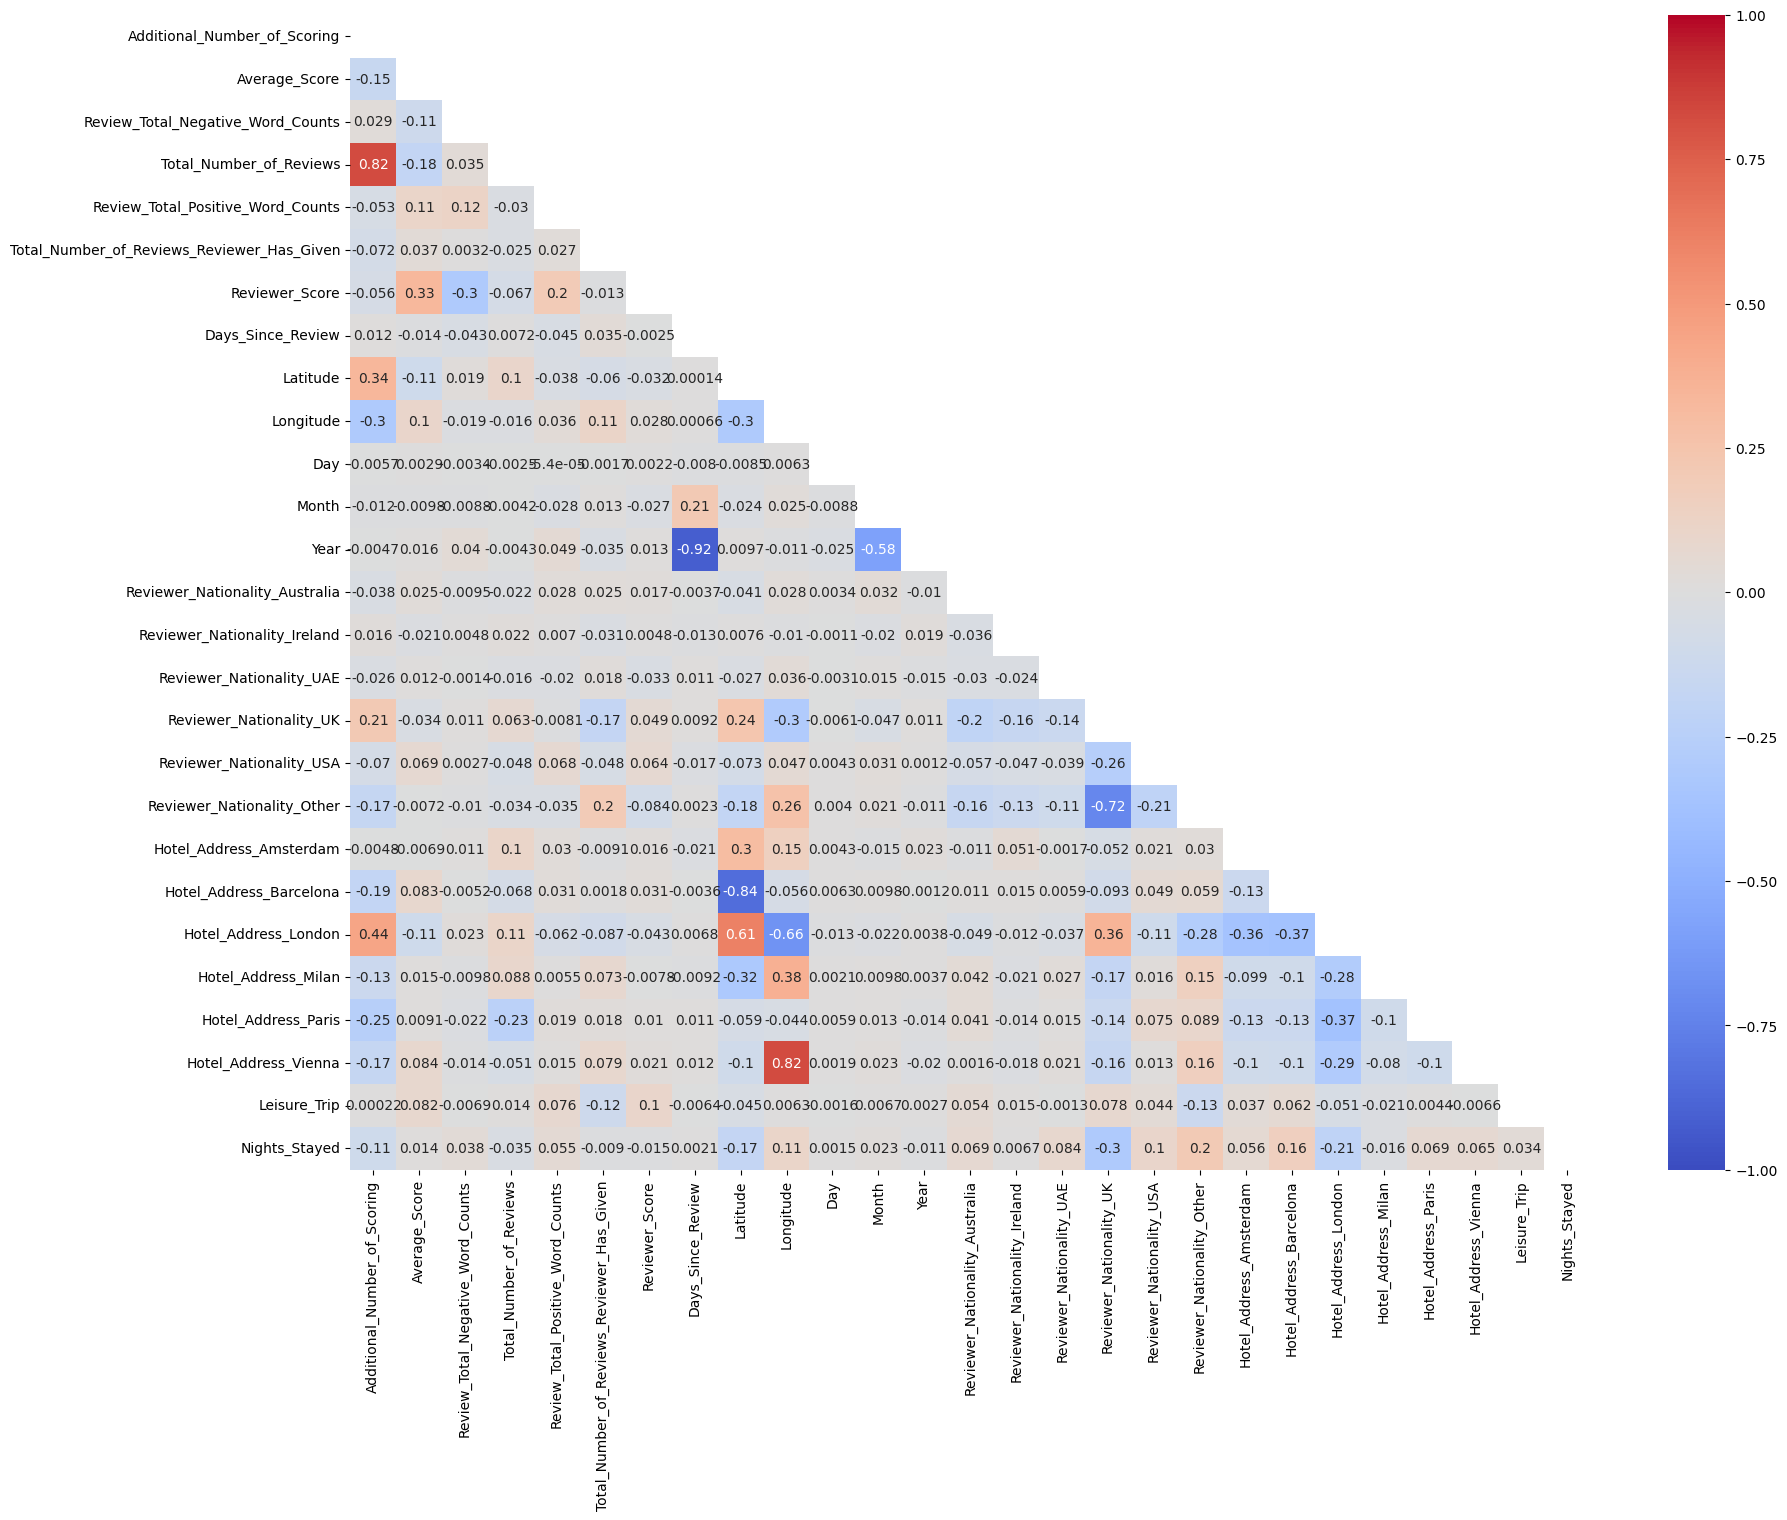

In [20]:
# Generate correlation matrix
correlation_matrix = numeric_hotel.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True,center=0, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

We see that some columns correlate with each other. For example, `Year` and `Days_Since_Review`. These two columns are related since one derives from other.

#### C. Dealing with missing data

In [21]:
# How many values are actually missing?
hotel_df2.isna().sum()

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

Based on the above, it appears there is no missing data in the dataset

### 1.3 Exploratory Data Analysis (EDA) <a name="eda"> </a>

Now that we've ensured that data is clean, let's do some analysis to address our original question:

`What are the characteristics of the reviews that contribute to greater customer satisfaction and higher ratings?`

We will divide our data into categorical and numeric and proceed in this way.

#### Univariate Analysis - Categorical Variables

Let's look at the variable of interest again, `Reviewer_Score`:

In [22]:
# Check the distribution of positive vs. negative reviews
hotel_df2['Reviewer_Score'].value_counts()/hotel_df2.shape[0]*100.0

Reviewer_Score
1    57.01001
0    42.98999
Name: count, dtype: float64

We see above, there is about a `57/43` split in positive and negative reviews. Let's take a look at the comments overall.

We will split the data into categorical and numerical variables, and do some EDA for both types.

In [23]:
hotel_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Negative_Review                             515199 non-null  object 
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 4   Total_Number_of_Reviews                     515199 non-null  int64  
 5   Positive_Review                             515199 non-null  object 
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 8   Reviewer_Score                              515199 non-null  int64  
 9   Days_Since_Review                           515199 non-null  int64  
 10  L

In [24]:
# Make a new dataframe of only the categorical variables
categorical_df = hotel_df2.select_dtypes('object').copy()

# Check
categorical_df.head()

,Negative_Review,Positive_Review
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...
1,No Negative,No real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...
4,You When I booked with your company on line y...,Amazing location and building Romantic setting


As exisitng categorical values are not informative for analysis, we will reverse one-hot-encoded columns: `Reviewer_Nationality` and `Hotel_Address` features

In [25]:
categorical_df['Reviewer_Nationality'] = hotel_df2[['Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland','Reviewer_Nationality_UAE','Reviewer_Nationality_UK','Reviewer_Nationality_USA', 'Reviewer_Nationality_Other']].idxmax(axis=1).str.split('_').str[-1]

In [26]:
categorical_df['Hotel_Address'] = hotel_df2[['Hotel_Address_Amsterdam','Hotel_Address_Barcelona', 'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',  'Hotel_Address_Vienna']].idxmax(axis=1).str.split('_').str[-1]

In [27]:
# sanity check
categorical_df['Reviewer_Nationality']

0             Other
1           Ireland
2         Australia
3                UK
4             Other
            ...    
515733        Other
515734        Other
515735        Other
515736        Other
515737        Other
Name: Reviewer_Nationality, Length: 515199, dtype: object

In [28]:
# sanity check
categorical_df['Hotel_Address']

0         Amsterdam
1         Amsterdam
2         Amsterdam
3         Amsterdam
4         Amsterdam
            ...    
515733       Vienna
515734       Vienna
515735       Vienna
515736       Vienna
515737       Vienna
Name: Hotel_Address, Length: 515199, dtype: object

In [29]:
# dropping the 'Negative_Review' and 'Positive_Review' as they contain text data which can not be analyzed through standard visualisation
categorical_df.drop(columns=['Negative_Review', 'Positive_Review'], inplace=True)

In [30]:
categorical_df.head()

,Reviewer_Nationality,Hotel_Address
0,Other,Amsterdam
1,Ireland,Amsterdam
2,Australia,Amsterdam
3,UK,Amsterdam
4,Other,Amsterdam


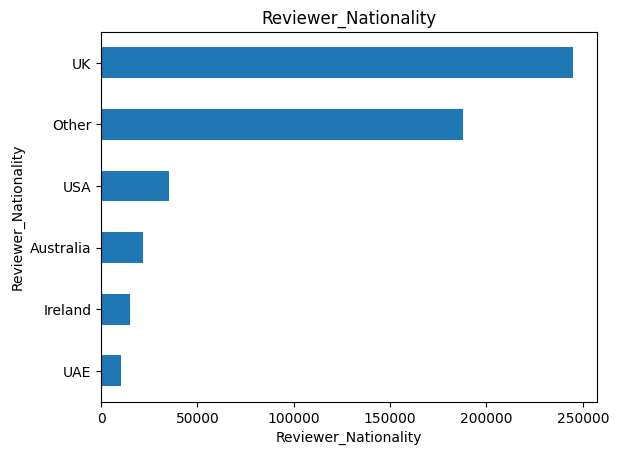

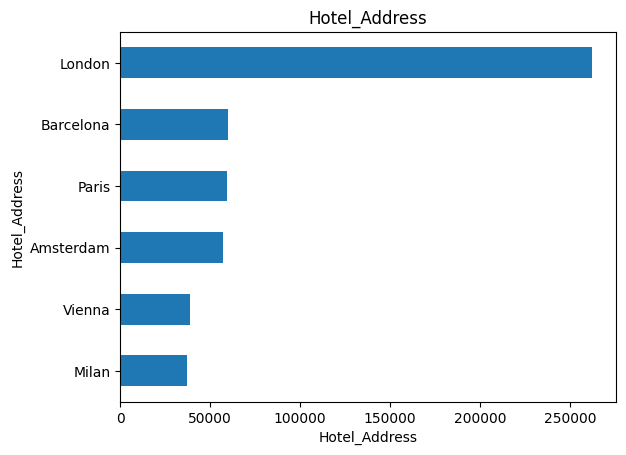

In [31]:
# Iterate over the columns

for column in categorical_df.columns:

    # Visualize a summary of each
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel(column)
    plt.title(column)
    plt.show()


We can see that:

    - Majority of the reviewers are from UK
    - Majority of the reviews were given to hotels from UK 

#### Univariate Analysis - Numeric Variables

Let's repeat the process we did above with the numeric variables:

In [32]:
hotel_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Negative_Review                             515199 non-null  object 
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 4   Total_Number_of_Reviews                     515199 non-null  int64  
 5   Positive_Review                             515199 non-null  object 
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 8   Reviewer_Score                              515199 non-null  int64  
 9   Days_Since_Review                           515199 non-null  int64  
 10  L

In [33]:
# Get only the numeric columns
numeric_df = hotel_df2.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,397,1403,11,7,0,0,52.360576,4.915968,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,0,1403,105,7,0,0,52.360576,4.915968,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,42,1403,21,9,0,3,52.360576,4.915968,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,210,1403,26,1,0,3,52.360576,4.915968,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,140,1403,8,3,0,10,52.360576,4.915968,...,0,1,1,0,0,0,0,0,1,2


We can exclude reviewer and hotel location related columns as they were encoded from the categorical variables. Also, excluded 'Leisure trip' column since it's not numerical.

In [34]:
numeric_df.drop(columns=['Reviewer_Nationality_Australia','Reviewer_Nationality_Ireland','Reviewer_Nationality_UAE','Reviewer_Nationality_UK','Reviewer_Nationality_USA',
               'Reviewer_Nationality_Other', 'Hotel_Address_Amsterdam','Hotel_Address_Barcelona','Hotel_Address_London','Hotel_Address_Milan',
                'Hotel_Address_Paris', 'Hotel_Address_Vienna'], inplace=True)

In [35]:
numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
0,194,7.7,397,1403,11,7,0,0,52.360576,4.915968,3,8,2017,1,6
1,194,7.7,0,1403,105,7,0,0,52.360576,4.915968,3,8,2017,1,4
2,194,7.7,42,1403,21,9,0,3,52.360576,4.915968,31,7,2017,1,3
3,194,7.7,210,1403,26,1,0,3,52.360576,4.915968,31,7,2017,1,3
4,194,7.7,140,1403,8,3,0,10,52.360576,4.915968,24,7,2017,1,2


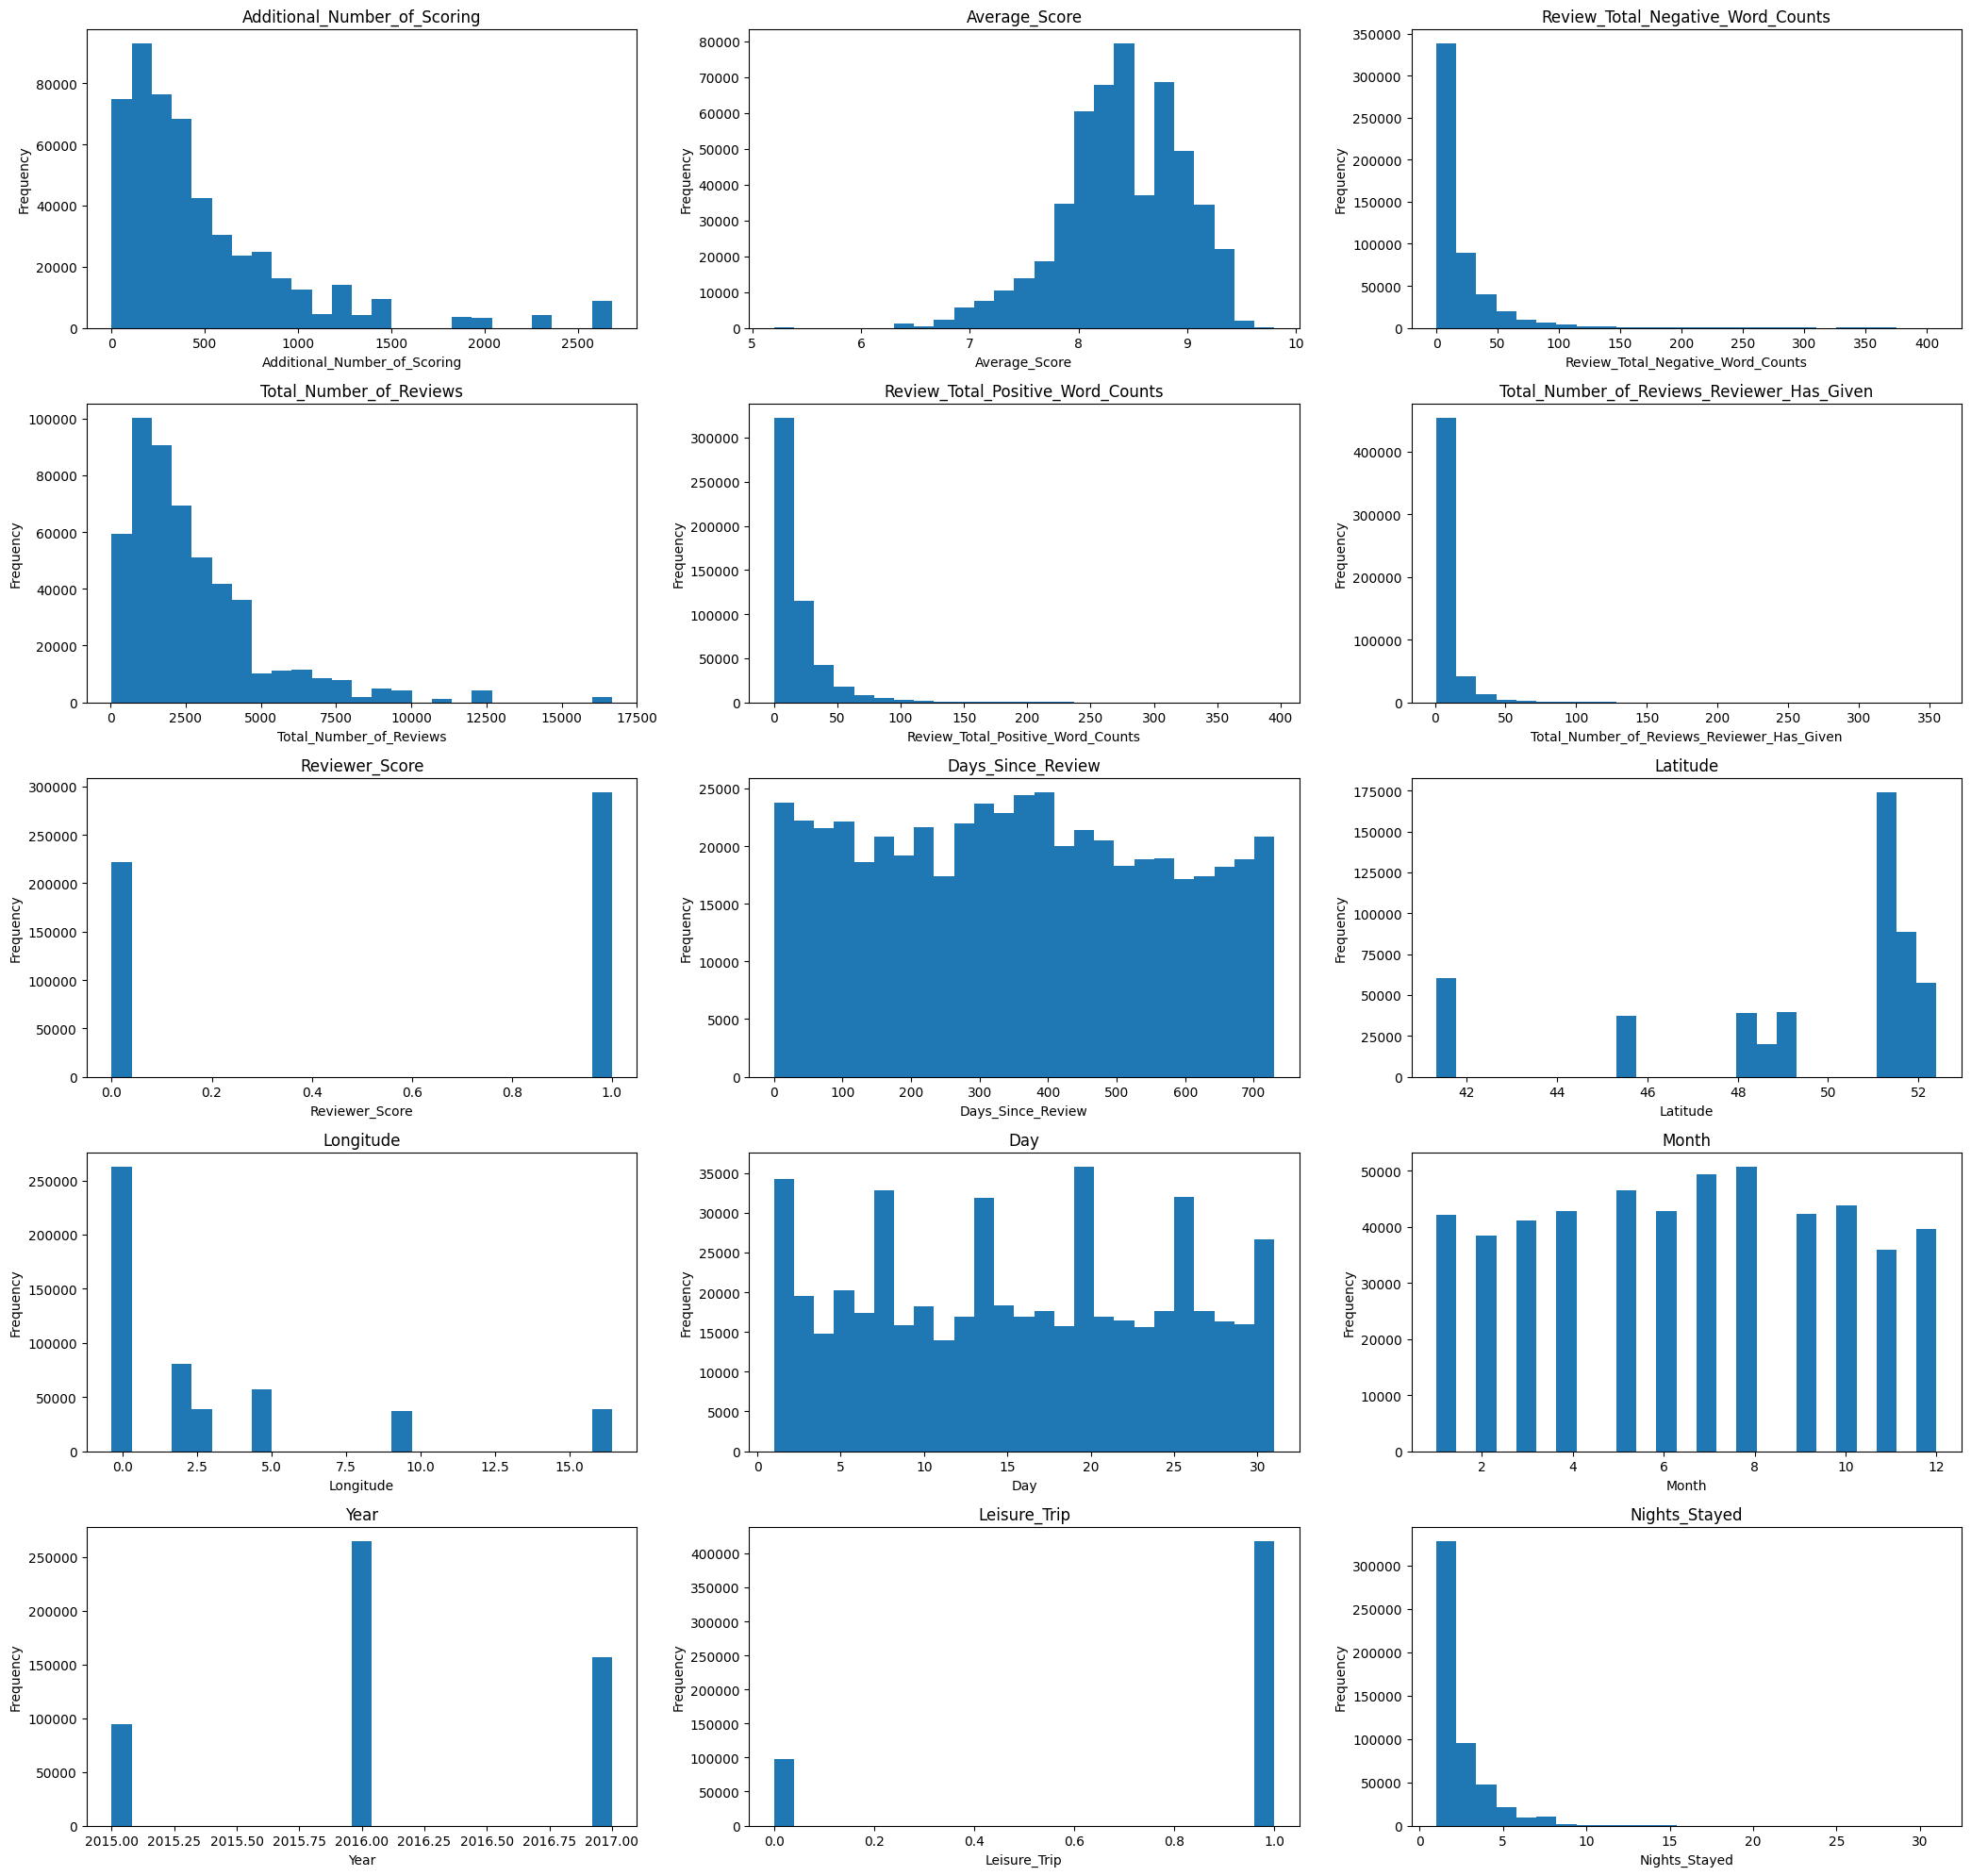

In [36]:
import matplotlib.pyplot as plt

# Define the number of columns per row
cols_per_row = 3

# Calculate the number of rows needed
num_cols = len(numeric_df.columns)
num_rows = num_cols // cols_per_row  # Ceiling division

# Create the subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 7, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and the corresponding axes
for idx, column in enumerate(numeric_df.columns):
    axes[idx].hist(numeric_df[column], bins=25)
    axes[idx].set_title(column)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')



# Adjust layout
plt.tight_layout()
plt.show()

Key insights: 
* Average_sore is around 8.0-9.0 [1:2]
* Distribution of count of words in positive and negative reviews is similar [1:3] and [2:1]
* Dataset is relatively balanced 60/40 [3:1]
* Reviewers mostly stayed in the hotels 1-2 days [5:3]
* ~80% of visitors were in a leisure trip [5:2]

#### Bivariate Analysis - Categorical Variables

Let's look at the Reviewer Nationality type now, is there a difference in the review sentiment by nationality?

In [38]:
#adding Reviewer_Score column into the categorical_df 
categorical_df['Reviewer_Score'] = hotel_df2['Reviewer_Score']

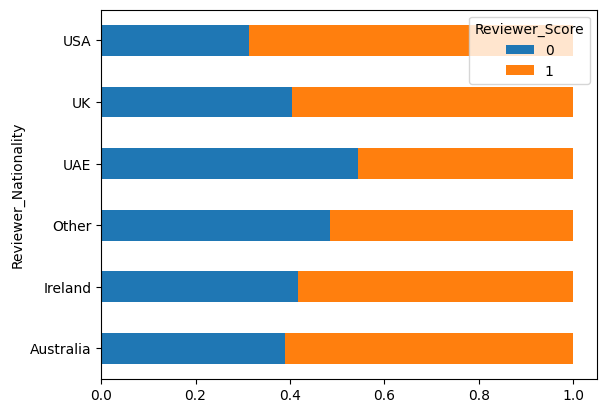

In [39]:
pct_hotel_df = categorical_df.groupby(['Reviewer_Nationality', 'Reviewer_Score'])['Reviewer_Nationality'].count()/categorical_df.groupby('Reviewer_Nationality')['Reviewer_Nationality'].count()

pct_hotel_df.unstack().plot(kind='barh', stacked=True)
plt.show()

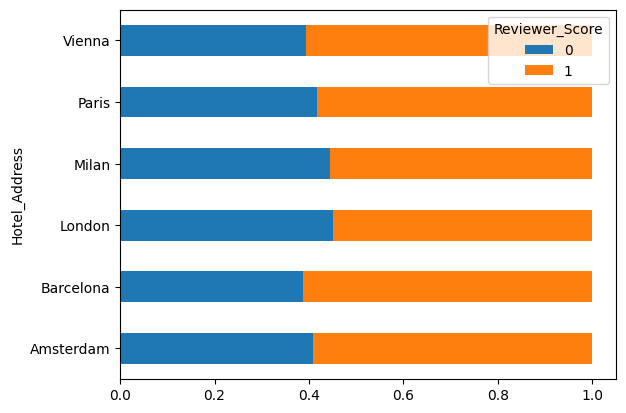

In [40]:
pct_hotel_df = categorical_df.groupby(['Hotel_Address', 'Reviewer_Score'])['Hotel_Address'].count()/categorical_df.groupby('Hotel_Address')['Hotel_Address'].count()

pct_hotel_df.unstack().plot(kind='barh', stacked=True)
plt.show()

* Only UAE people on average gave more negative reviews than positive.
* USA people had 70/30 distribution between positive and negative reviews.
* The reviewers falling into `Others` category left equal amount of positive and negative reviews.
* Except `UEA`, `USA` and `Others`, distribution of positive/negative reviews by cities and reviewer nationalities followed general 60/40 trend.

#### Bivariate Analysis - Numeric Variables

Now we will repeat the process for numeric variables.

In [41]:
# We need the "Reviewer_Score" variable so we will add it back to our numeric dataframe
numeric_df['Reviewer_Score'] = hotel_df2['Reviewer_Score'].map({1:'positive', 0:'negative'})

# Check
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 3   Total_Number_of_Reviews                     515199 non-null  int64  
 4   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 5   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 6   Reviewer_Score                              515199 non-null  object 
 7   Days_Since_Review                           515199 non-null  int64  
 8   Latitude                                    515199 non-null  float64
 9   Longitude                                   515199 non-null  float64
 10  D

In [42]:
numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
0,194,7.7,397,1403,11,7,negative,0,52.360576,4.915968,3,8,2017,1,6
1,194,7.7,0,1403,105,7,negative,0,52.360576,4.915968,3,8,2017,1,4
2,194,7.7,42,1403,21,9,negative,3,52.360576,4.915968,31,7,2017,1,3
3,194,7.7,210,1403,26,1,negative,3,52.360576,4.915968,31,7,2017,1,3
4,194,7.7,140,1403,8,3,negative,10,52.360576,4.915968,24,7,2017,1,2


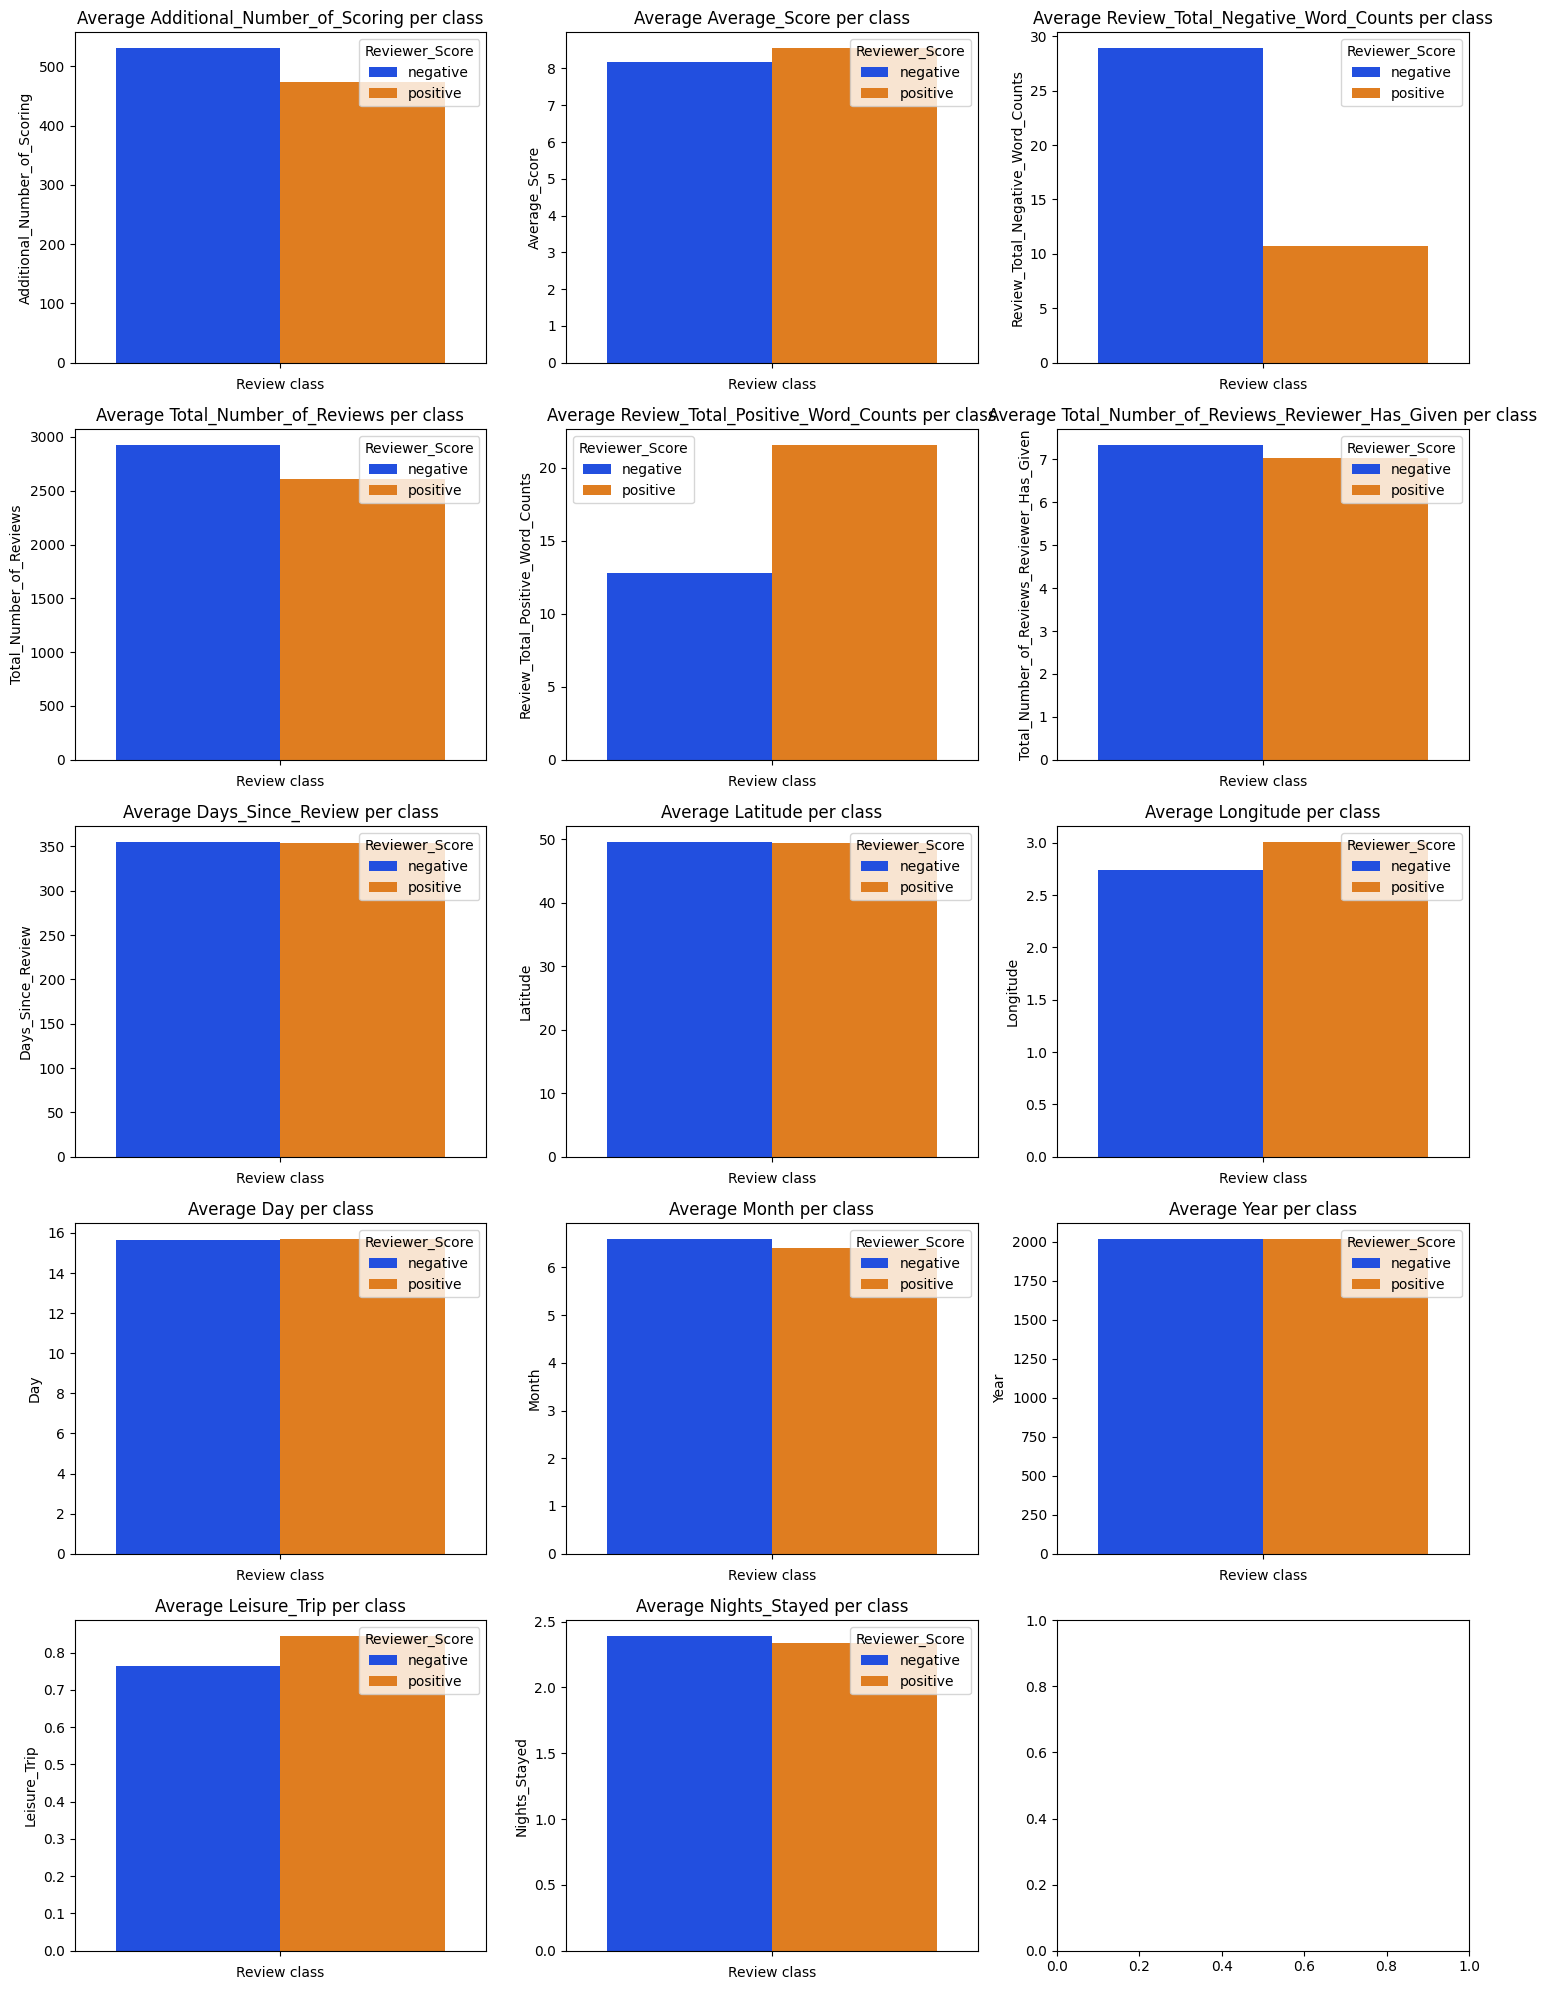

In [44]:
plot_num = 1
plt.subplots(5,3, figsize=(15,20))

for col in numeric_df.drop(columns='Reviewer_Score'):
    plt.subplot(5,3,plot_num)
    
    df= numeric_df.groupby('Reviewer_Score')[col].mean().reset_index()
    
    sns.barplot(hue='Reviewer_Score', y=col, data=df, palette='bright')
    plot_num +=1
    
    plt.xlabel('Review class')
    plt.title(f'Average {col} per class')
    
plt.tight_layout()
plt.show()

Except `Review_Total_Negative_Words_Counts` and `Review_Total_Positive_Words_Counts`, there is no significant difference between average of numeric variables.

#### Summary

1. `Average Score` of positive reviews is slightly higher. [1:2]
2. Negative reviews have slightly higher `Total Number of Reviews` in average. [2:1]
3. Total Positive Word Counts and Total Negative Words Counts showed solid relationship with the target value. [1:3] and [2:1]
4. Reviewers from UAE tend to provide more negative reviews than positive.

## 2. Data Preprocessing <a name="data_preprocessing"></a>

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# store simplified data in X and y
X = hotel_df2.drop(columns=['Reviewer_Score'])
y = hotel_df2['Reviewer_Score']

In [56]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # stratify per target to ensure data imbalance is preserved in train and test set   
X_train.reset_index(drop=True, inplace=True) # resetting the index to get it ready for the further concatenation operations
X_test.reset_index(drop=True, inplace=True) # resetting the index to get it ready for the further concatenation operations

In [57]:
# sanity check
X_test.shape

(103040, 28)

In [58]:
# sanity check
X_train.shape

(412159, 28)

### 2.1 Bag of Words For Negative Reviews <a name="bag_negative"></a>

We will apply text preprocessing for machine learning, specifically focusing on transforming negative reviews into a numerical format that can be used for model training and testing.

CounterVectorizer will be used to convert a collection of text documents to a matrix of token counts, which is a type of bag-of-words model.

**Parameters:**  
**max_features=500:** This limits the number of features (words) to the top 500 most frequently occurring words in the corpus.  
**min_df=10:** This ignores all words that appear in fewer than 10 documents. It helps to remove infrequent words that may not provide much value.  
**stop_words='english':** This removes common English stop words (like "and", "the", etc.) which are often not useful for predictive modeling.

In [61]:
# transforming based on negative reviews

# 1. Instantiate
neg_bagofwords= CountVectorizer(max_features=500, min_df=10, stop_words='english')

# 2. Fit and Transform
neg_train_transformed = neg_bagofwords.fit_transform(X_train["Negative_Review"])

# 3. 
neg_test_transformed = neg_bagofwords.transform(X_test['Negative_Review'])

`neg_bagofwords.vocabulary_` is a dictionary that include all words from negative reviews and their frequency. To differentiate words that appear in both negative and positive reviews, let's add prefix.

In [62]:
# Add prefix to vocabulary
prefix = 'neg_'
neg_bagofwords.vocabulary_ = {prefix + key: value for key, value in neg_bagofwords.vocabulary_.items()}

In [63]:
# dense matrix representaion
neg_test_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Now, we are ready to look at the top 20 words that appear in negative reviews and visualize the distribution of counts:

In [29]:
word_counts = pd.DataFrame(
    {"counts": neg_train_transformed.toarray().sum(axis=0)},
    index=neg_bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

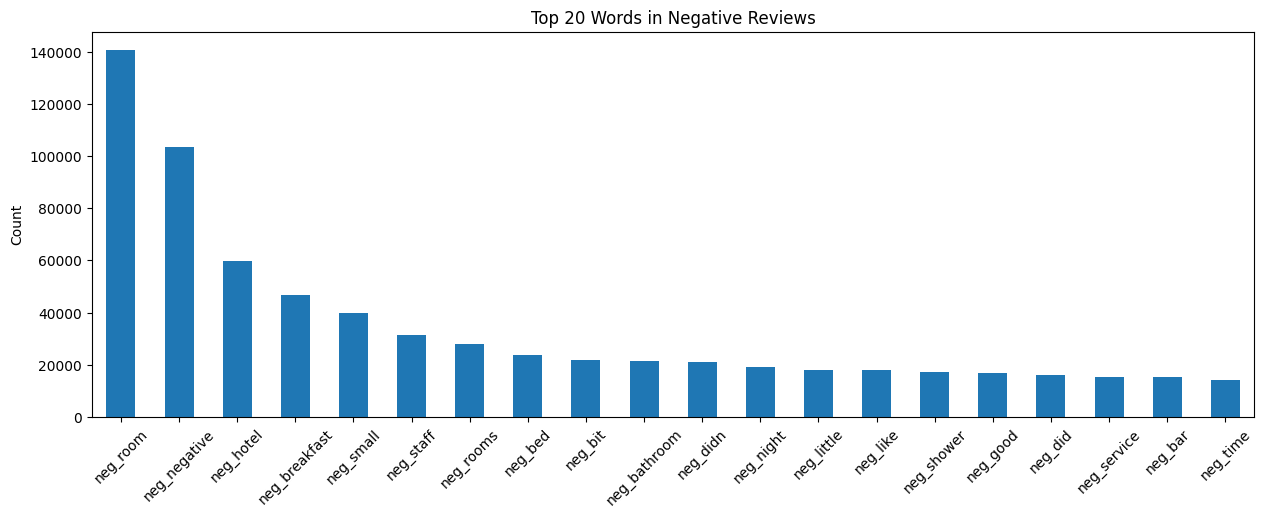

In [32]:
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Words in Negative Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 2.2 Bag of Words For Positive Reviews <a name="bag_positive"> </a>

We will apply the same logic to positive reviews.

In [64]:
# transforming based on positive reviews

# 1. Instantiate 
pos_bagofwords = CountVectorizer(max_features=500, min_df=10, stop_words='english')

# 2. Fit and Transform
pos_train_transformed = pos_bagofwords.fit_transform(X_train['Positive_Review'])

# 3. Transform Test
pos_test_transformed = pos_bagofwords.transform(X_test['Positive_Review'])


In [65]:
# Add prefix to vocabulary
prefix = 'pos_'
pos_bagofwords.vocabulary_ = {prefix + key: value for key, value in pos_bagofwords.vocabulary_.items()}

In [66]:
#check
pos_test_transformed.shape

(103040, 500)

In the same fashion, let's look at the top 20 words used in negative reviews

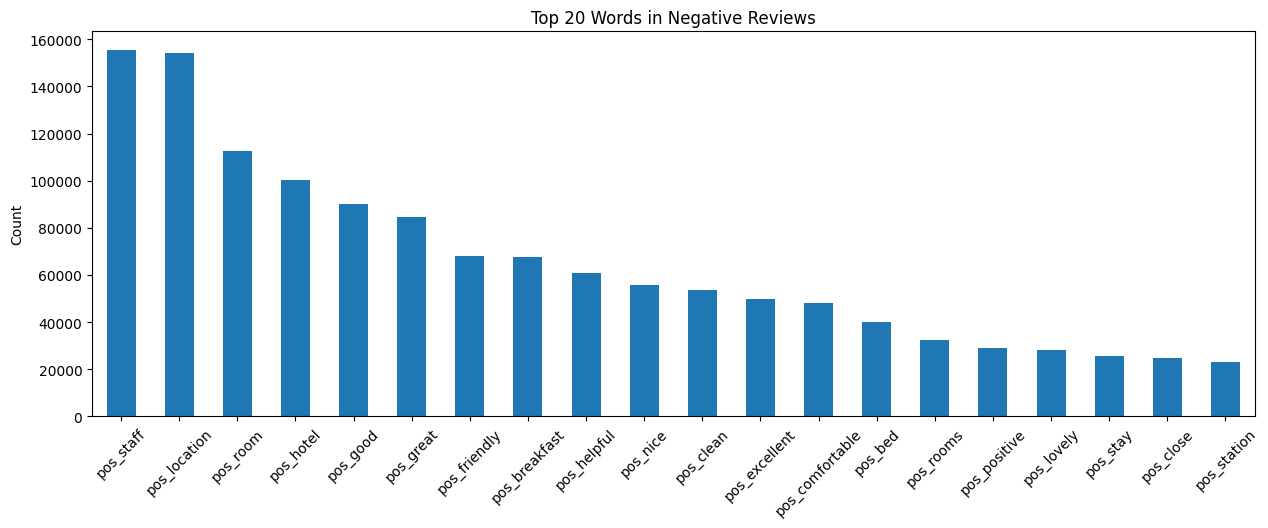

In [67]:
word_counts = pd.DataFrame(
    {"counts": pos_train_transformed.toarray().sum(axis=0)},
    index=pos_bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Words in Negative Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 2.3 Combine Numeric and Vectorized Features <a name="combine_1"> </a>

Now that we have converted both positive and negative reviews into vectors, let's combine them with the numeric features to create a complete dataset for modeling.








In [68]:
# 1. remove object columns from the test and train datasets
X_train_1 = X_train.drop(columns=['Positive_Review', 'Negative_Review'])
X_test_1 = X_test.drop(columns=['Positive_Review', 'Negative_Review'])

In [69]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
# Sparse matrix
X_train_combined = hstack([csr_matrix(X_train_1.values), pos_train_transformed, neg_train_transformed])

In [70]:
X_test_combined = hstack([csr_matrix(X_test_1.values), pos_test_transformed, neg_test_transformed])

In [71]:
type(X_train_combined)

scipy.sparse._csr.csr_matrix

In [72]:
type(X_train_combined)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11203206 stored elements and shape (412159, 1026)>

Now we have the train and test datasets in sparse matrix format.

## 3. Modelling With Logistic Classifier <a name="modelling_logistic"> </a>

We will train the model to predict positive reviews and analyze the words that have the highest predictive power, meaning the presence of these words in a review indicates positive sentiment. We will also identify the words that indicate negative sentiment. It is important to examine these negative indicators so that management can find ways to address and overcome the challenges.

### 3.1 Initial Predcition of Positive Reviews <a name="initial_positive_1"> </a>

The `MaxAbsScaler` from scikit-learn is well-suited for scaling sparse matrix as it scales each feature by its maximum absolute value, ensuring the values are between -1 and 1. This scaler works efficiently with sparse data and does not convert it to a dense format, preserving memory efficiency.

In [74]:
from sklearn.preprocessing import MaxAbsScaler

In [420]:
# Example combined sparse matrix for training data (neg + pos reviews + numeric features)

# Initialize the scaler
scaler = MaxAbsScaler()

# Fit and transform the training data
train_scaled = scaler.fit_transform(X_train_combined)

# Transform the test data
test_scaled = scaler.transform(X_test_combined)

# Now train_scaled and test_scaled are the scaled sparse matrices

In [421]:
from sklearn.linear_model import LogisticRegression
import time

start = time.time()

# Fitting a model
positive_logreg = LogisticRegression(n_jobs=-1, verbose=1, max_iter=1000)
positive_logreg.fit(train_scaled, y_train)
end = time.time()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1027     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  7.62497D-02


 This problem is unconstrained.



At iterate   50    f=  4.48068D-01    |proj g|=  8.29954D-04

At iterate  100    f=  4.45664D-01    |proj g|=  4.33711D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1027    144    167      1     0     0   8.545D-05   4.454D-01
  F =  0.44538153550136234     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [422]:
# Training and test score
print(f"Train score: {positive_logreg.score(train_scaled, y_train)}")
print(f"Test score: {positive_logreg.score(test_scaled, y_test)}")

Train score: 0.7911655453356593
Test score: 0.7882569875776397


In [86]:
# Concatenate the feature names
concatenated_feature_names = np.hstack((X_train_1.columns, pos_bagofwords.get_feature_names_out(), neg_bagofwords.get_feature_names_out()))

In [87]:
concatenated_feature_names

array(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', ..., 'neg_worth',
       'neg_wouldn', 'neg_wrong'], dtype=object)

In [88]:
concatenated_feature_names.shape

(1026,)

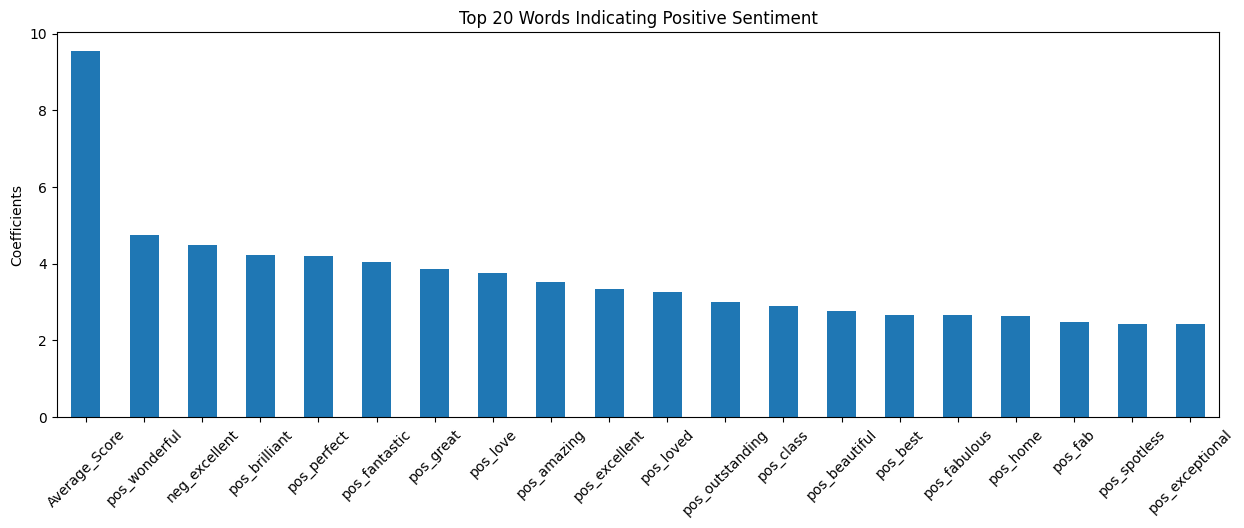

In [89]:
# dataframe that contains feature names as index and their coefficients in the trained model
word_counts = pd.DataFrame(
    {"coefficients": positive_logreg.coef_[0]},
    index=concatenated_feature_names
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Words Indicating Positive Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

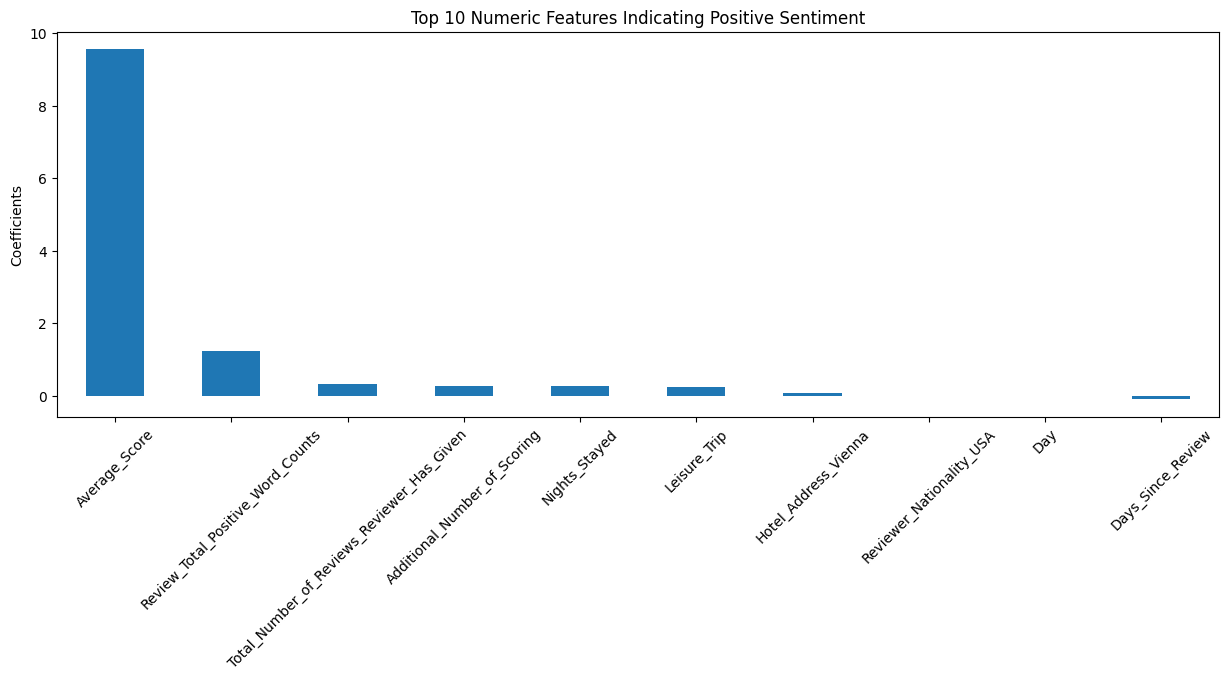

In [91]:
# the datframe is built to include only numeric features (first 26 features)
word_counts = pd.DataFrame(
    {"coefficients": positive_logreg.coef_[0][0:26]},
    index=X_train_1.columns
).sort_values("coefficients", ascending=False)

word_counts.head(10).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 10 Numeric Features Indicating Positive Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

#### Insights Drawn

1. The train and test accuracy were similar, apoximately `~79.1%` and `~78.8%`, respectively. This indicates a high bias and low variance scenario, which is typical for Logistic Regression models.

2. Top predictors of positive sentiment are `Average_score` and words from **positive reviews** like `wonderful`,`excellent`, `brilliant`, `perfect` etc. However, these words are mostly adjectives and don't specify what qualities (or subject) of hotel stay contributed to positive feedback. 

3. Among the numeric features, `Review_Total_Positive_Word_Counts`, `Total_Number_of_Reviews_Reviewer_Has_Given`, `Additional_Number_of_Scoring`, `Nights_Stayed`,`Leisure Trip` demonstrated higher predictive capability compared to others.

### 3.2 Initial Prediction of Negative Reviews <a name="initial_negative_1"> </a>

We will switch the positive and negative classes, designating negative reviews as the positive class. This adjustment will enable the model to predict negative reviews.

In [92]:
y_train_inverted = 1 - y_train
y_test_inverted = 1 - y_test

In [93]:
# train the model
start = time.time()
negative_logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
negative_logreg.fit(train_scaled, y_train_inverted)
end = time.time()

In [94]:
print (end-start)

4.845922231674194


In [95]:
# Training and test score
print(f"Train score: {negative_logreg.score(train_scaled, y_train_inverted)}")
print(f"Test score: {negative_logreg.score(test_scaled, y_test_inverted)}")

Train score: 0.791136430358187
Test score: 0.7882472826086957


In [96]:
# Concatenate the feature names
concatenated_feature_names = np.hstack((X_train_1.columns, pos_bagofwords.get_feature_names_out(), neg_bagofwords.get_feature_names_out()))

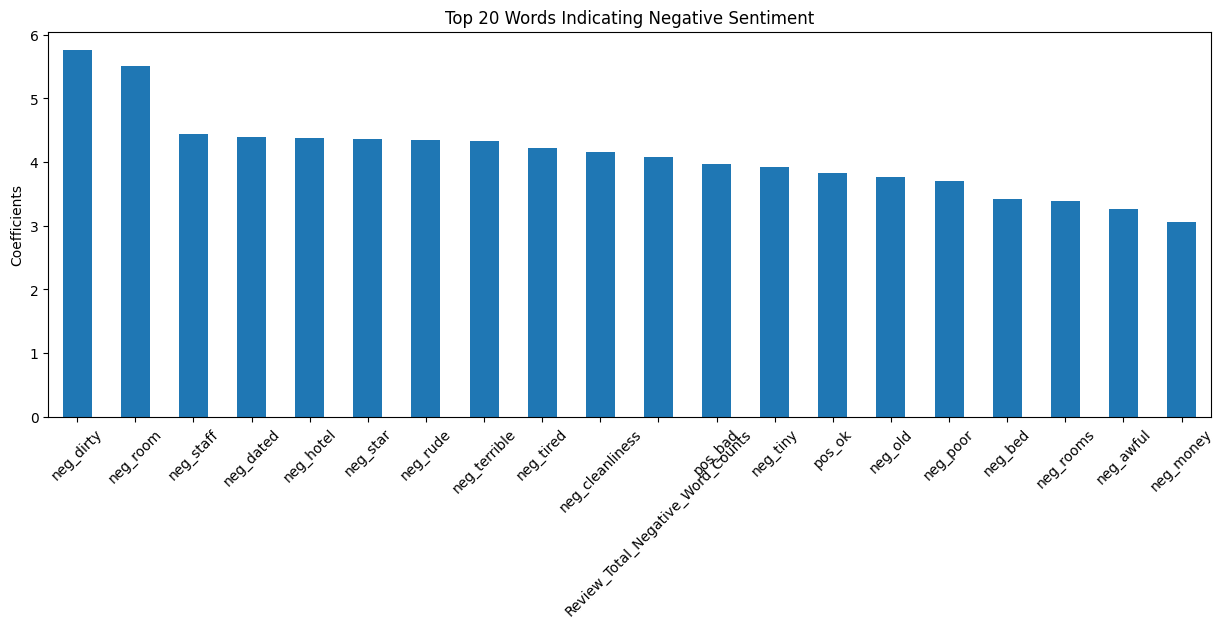

In [97]:
word_counts = pd.DataFrame(
    {"coefficients": negative_logreg.coef_[0]},
    index=concatenated_feature_names
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Words Indicating Negative Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

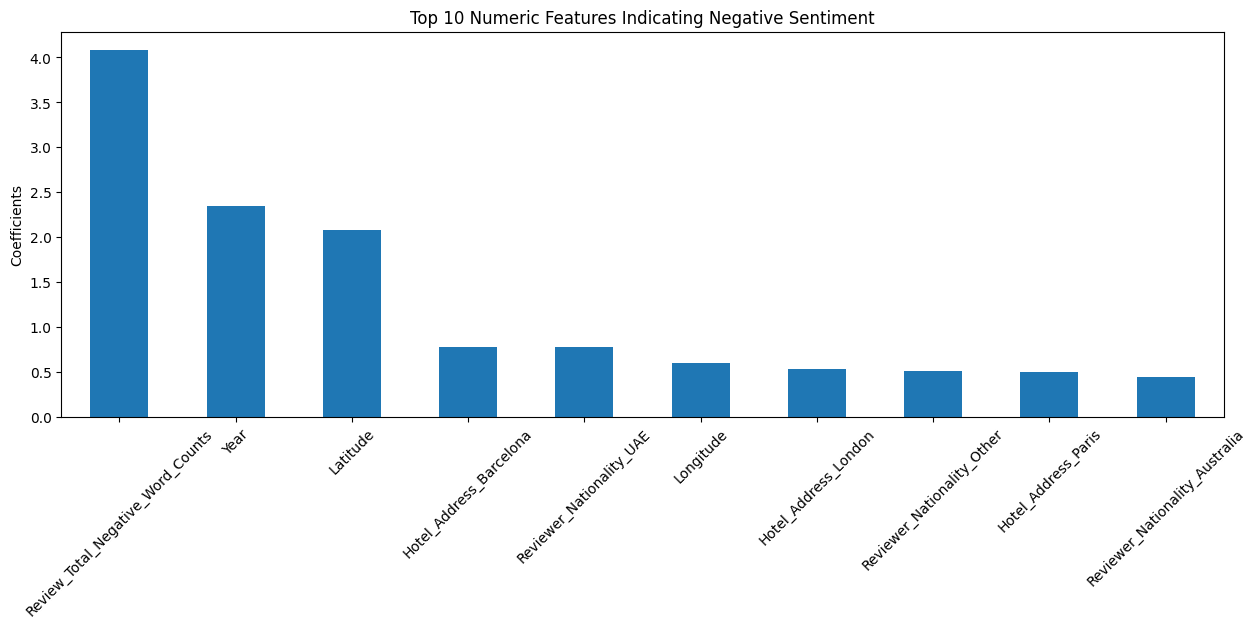

In [98]:
word_counts = pd.DataFrame(
    {"coefficients": negative_logreg.coef_[0][0:26]},
    index=X_train_1.columns
).sort_values("coefficients", ascending=False)

word_counts.head(10).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 10 Numeric Features Indicating Negative Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

#### Insights Drawn

1. The train and test accuracy were similar, approximately `79.1% and 78.8%`, respectively. This indicates a high bias and low variance scenario, which is typical for Logistic Regression models.

2. The words like `dirty`, `room`, `staff`, `dated `, `hotel`, `star`, `rude`, `cleanliness`, `bed`, etc. had highest negative coefficient in the prediction model. Some words like `cleanliness` and `bed` provide some good insights that management can into account. 

3. `Review_Total_Negative_Word_Counts` is differ from other numeric features in terms of predcitive power. 

### 3.3 Model Optimization <a name="optimize_1"> </a>

#### Optimization Plan:
1. Exclude features with low predicitve power. The features that will remain are: `average score`, `Review_Total_Positive_Word_Counts`, `Total_Number_of_Reviews_Reviewer_Has_Given`, `Additional_Number_Of_Scoring`, `Nights_Statyed` and `Leasure Trip`.
2. Use `n-grams` to capture more meanings from the sequence of words and `stemming` to reduce words to their base or root form.
3. Apply hypetparameter optimization by finding the best regulariation (C) value. 5-fold cross validation will be applied.

#### 3.3.1. Feature selection

We selected features that had coefficients of approximately `0.2 or higher` in the models to predict both negative and positive reviews.

In [218]:
#X_train_opt = X_train[['Average_Score', 'Review_Total_Positive_Word_Counts', 'Reviewer_Nationality_USA', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Additional_Number_of_Scoring', 'Nights_Stayed', 'Leisure_Trip']]

X_train_opt = X_train_1

In [219]:
#X_test_opt = X_test[['Average_Score', 'Review_Total_Positive_Word_Counts', 'Reviewer_Nationality_USA', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Additional_Number_of_Scoring', 'Nights_Stayed', 'Leisure_Trip']]

X_test_opt = X_test_1

#### 3.3.2 Adding N-grams and Stemming to Negative Reviews

In [220]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

In [221]:
# Download necessary NLTK data files
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/aidos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [222]:
# Initialize the stemmer
stemmer = PorterStemmer()

In [223]:
# Define a custom tokenizer function
def stemmed_words(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [224]:
# Create a new CountVectorizer instance
neg_bagofwords_opt = CountVectorizer(min_df=10, ngram_range=(1, 3), stop_words='english', max_features=500, tokenizer=stemmed_words)

In [225]:
# Fit the CountVectorizer to the 'Negative_Review' column of the training data
# and transform the text data into a bag-of-words representation
# The resulting matrix is assigned to neg_train_transformed_opt
neg_train_transformed_opt=neg_bagofwords_opt.fit_transform(X_train['Negative_Review'])


/home/aidos/Desktop/Hotel-Review-Analysis/hotel_review/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/aidos/Desktop/Hotel-Review-Analysis/hotel_review/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 

In [226]:
# same applies to test data
neg_test_transformed_opt = neg_bagofwords_opt.fit_transform(X_test['Negative_Review'])


In [227]:
# the new datasets are sparse matrixes
type(neg_test_transformed_opt)

scipy.sparse._csr.csr_matrix

In [228]:
# Add prefix to vocabulary
prefix = 'neg_'
neg_bagofwords_opt.vocabulary_ = {prefix + key: value for key, value in neg_bagofwords_opt.vocabulary_.items()}

Let's see what words appear more frequently in the vocabulary:

In [229]:
# Access the vocabulary
vocabulary = neg_bagofwords_opt.vocabulary_

# Create a list of tuples where each tuple contains the term and its count
vocab_items = [(term, count) for term, count in vocabulary.items()]

# Sort the list of tuples by the count of occurrences (the second element in each tuple, which is count)
sorted_vocab = sorted(vocab_items, key=lambda x: x[1], reverse=True)

# Get the top 10 items by frequency
top_10_items = sorted_vocab[:10]

# Print the top 10 items
print(top_10_items)

[('neg_year', np.int64(499)), ('neg_wrong', np.int64(498)), ('neg_wouldn t', np.int64(497)), ('neg_wouldn', np.int64(496)), ('neg_worth', np.int64(495)), ('neg_worst', np.int64(494)), ('neg_work', np.int64(493)), ('neg_window', np.int64(492)), ('neg_wifi wa', np.int64(491)), ('neg_wifi', np.int64(490))]


#### Adding N-grams and Stemming to Positive Reviews

In [230]:
# Define a custom tokenizer function
def stemmed_words_1(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [231]:
# Create a new CountVectorizer instance
pos_bagofwords_opt = CountVectorizer(min_df=10, ngram_range=(1, 3), stop_words='english', max_features=500, tokenizer=stemmed_words_1)

In [232]:
# Fit the CountVectorizer to the 'Negative_Review' column of the training data
# and transform the text data into a bag-of-words representation
# The resulting matrix is assigned to neg_train_transformed_opt
pos_train_transformed_opt=pos_bagofwords_opt.fit_transform(X_train['Positive_Review'])

In [233]:
# same applies to test data
pos_test_transformed_opt = pos_bagofwords_opt.fit_transform(X_test['Positive_Review'])

In [234]:
# Add prefix to vocabulary
prefix = 'pos_'
pos_bagofwords_opt.vocabulary_ = {prefix + key: value for key, value in pos_bagofwords_opt.vocabulary_.items()}

Let's see what words appear more frequently in the vocabulary:

In [235]:
# Access the vocabulary
vocabulary = pos_bagofwords_opt.vocabulary_

# Create a list of tuples where each tuple contains the term and its count
vocab_items = [(term, count) for term, count in vocabulary.items()]

# Sort the list of tuples by the count of occurrences (the second element in each tuple, which is count)
sorted_vocab = sorted(vocab_items, key=lambda x: x[1], reverse=True)

# Get the top 10 items by frequency
top_10_items = sorted_vocab[:10]

# Print the top 10 items
print(top_10_items)

[('pos_year', np.int64(499)), ('pos_worth', np.int64(498)), ('pos_work', np.int64(497)), ('pos_wonder', np.int64(496)), ('pos_window', np.int64(495)), ('pos_wifi', np.int64(494)), ('pos_went', np.int64(493)), ('pos_welcom', np.int64(492)), ('pos_way', np.int64(491)), ('pos_water', np.int64(490))]


Combining 3 datasets:

In [236]:
X_train_opt.shape

(412159, 26)

In [237]:
X_test_opt.shape

(103040, 26)

In [238]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
# Sparse matrix
X_train_combined_opt = hstack([csr_matrix(X_train_opt.values), pos_train_transformed_opt, neg_train_transformed_opt])

In [239]:
X_test_combined_opt = hstack([csr_matrix(X_test_opt.values), pos_test_transformed_opt, neg_test_transformed_opt])

In [240]:
type(X_train_combined_opt)

scipy.sparse._csr.csr_matrix

In [241]:
X_test_combined_opt.shape

(103040, 1026)

#### 3.3.3. Regularization Strength (C) and Penalty

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

As finding the best performing C value requires extensive experimentation.

In [243]:
# Example combined sparse matrix for training data (neg + pos reviews + numeric features)

# Initialize the scaler
scaler = MaxAbsScaler()

# Fit and transform the training data
train_scaled_opt = scaler.fit_transform(X_train_combined_opt)

# Transform the test data
test_scaled_opt = scaler.transform(X_test_combined_opt)

# Now train_scaled and test_scaled are the scaled sparse matrices

In [350]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Create placeholders for all three steps
param_grid = {'model__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [351]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

# Three models, two scalers, two dimensional reducers
# Since each model has different parameter names, they each have to go in a separate dictionary. 


# Create a pipeline with standard scaler and logistic regression
pipeline = Pipeline([
    ('model', LogisticRegression(max_iter=30000))
])

In [352]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [353]:
start = time.time()

fittedgrid = grid.fit(train_scaled_opt, y_train)

end = time.time()

print(end-start)

7.1063196659088135


In [354]:
fittedgrid.best_params_

{'model__C': 0.01}

The best hyperparameter for the logistic classification is C = `0.01`

### 3.4 Fitting With Optimized Hyperparameters <a name="optimize_fitting_1"> </a>

In [348]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

start = time.time()

logreg_opt = LogisticRegression(C=0.01, max_iter=30000, penalty='l2', solver = 'lbfgs') # setting optimal hyperparameter that was calculated before
logreg_opt.fit(train_scaled_opt, y_train)

end = time.time()
print(end-start)

2.585953950881958


In [349]:
# Training and test score
print(f"Train score: {logreg_opt.score(train_scaled_opt, y_train)}")
print(f"Test score: {logreg_opt.score(test_scaled_opt, y_test)}")

Train score: 0.788831494641631
Test score: 0.7404794254658386


In [359]:
# Concatenate the feature names
concatenated_feature_names = np.hstack((X_train_1.columns, pos_bagofwords_opt.get_feature_names_out(), neg_bagofwords_opt.get_feature_names_out()))

In [360]:
concatenated_feature_names

array(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', ..., 'neg_wouldn t',
       'neg_wrong', 'neg_year'], dtype=object)

In [361]:
concatenated_feature_names.shape

(1026,)

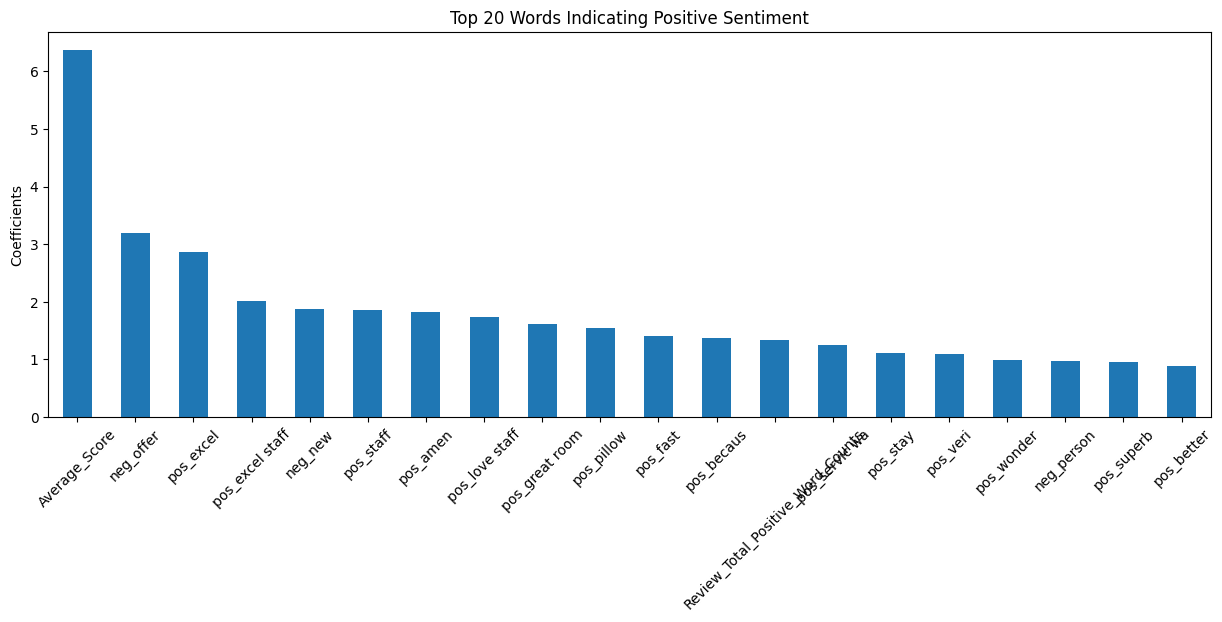

In [362]:
# dataframe that contains feature names as index and their coefficients in the trained model
word_counts = pd.DataFrame(
    {"coefficients": logreg_opt.coef_[0]},
    index=concatenated_feature_names
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Words Indicating Positive Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

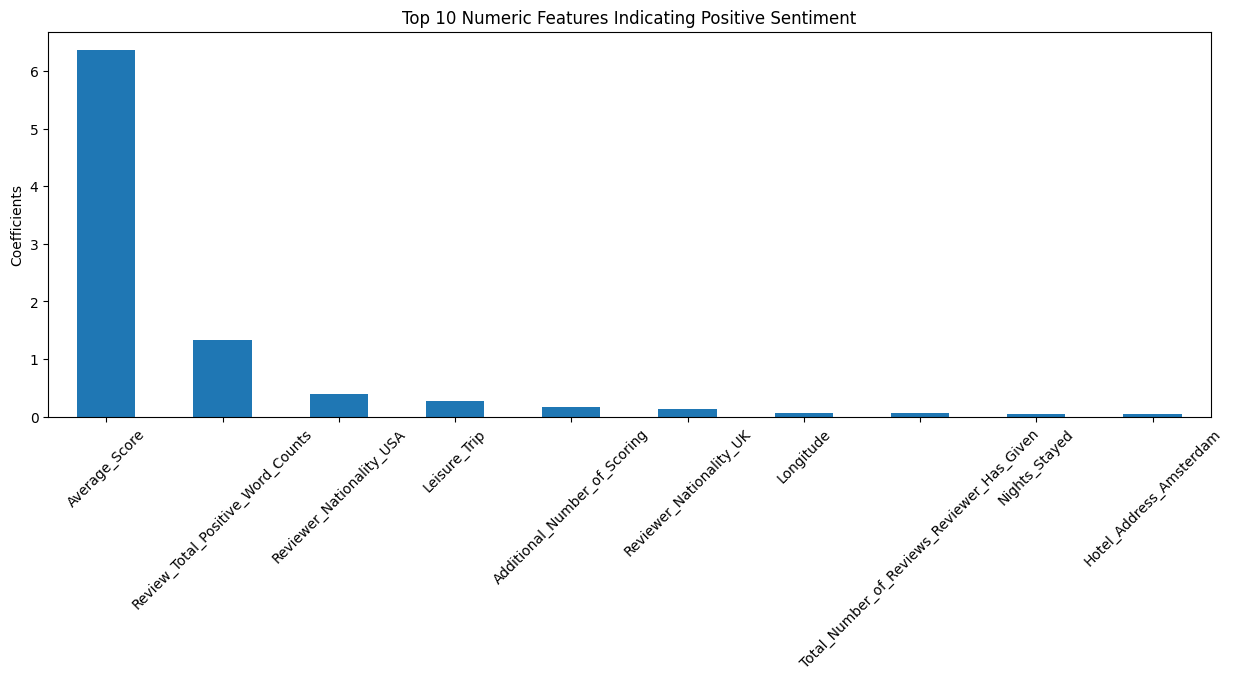

In [364]:
# the datframe is built to include only numeric features (first 26 features)
word_counts = pd.DataFrame(
    {"coefficients": logreg_opt.coef_[0][0:26]},
    index=X_train_1.columns
).sort_values("coefficients", ascending=False)

word_counts.head(10).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 10 Numeric Features Indicating Positive Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

Let's see if there will be any difference when negative review is the positive class.

In [92]:
y_train_inverted = 1 - y_train
y_test_inverted = 1 - y_test

In [366]:
# train the model
neg_logreg_opt = LogisticRegression(C=0.01, max_iter=30000, penalty='l2', solver = 'lbfgs') # setting optimal hyperparameter that was calculated before
neg_logreg_opt.fit(train_scaled_opt, y_train_inverted)

LogisticRegression(C=0.01, max_iter=30000)

In [94]:
print (end-start)

4.845922231674194


In [367]:
# Training and test score
print(f"Train score: {neg_logreg_opt.score(train_scaled_opt, y_train_inverted)}")
print(f"Test score: {neg_logreg_opt.score(test_scaled_opt, y_test_inverted)}")

Train score: 0.788831494641631
Test score: 0.7404600155279503


In [368]:
# Concatenate the feature names
concatenated_feature_names = np.hstack((X_train_1.columns, pos_bagofwords.get_feature_names_out(), neg_bagofwords.get_feature_names_out()))

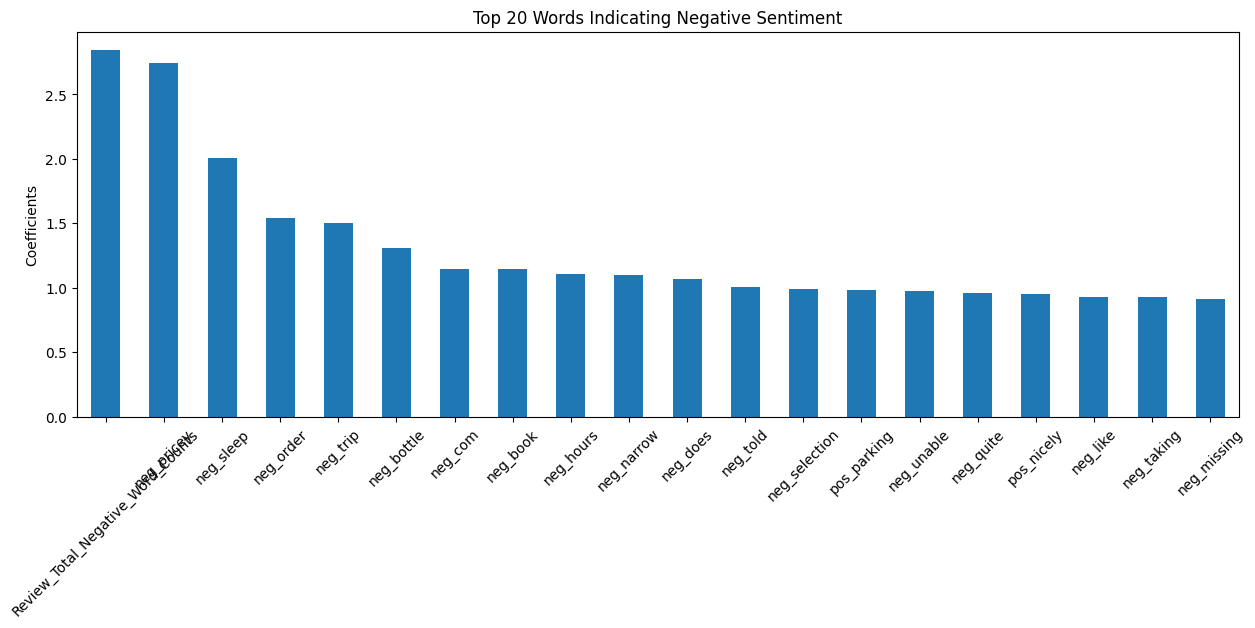

In [370]:
word_counts = pd.DataFrame(
    {"coefficients": neg_logreg_opt.coef_[0]},
    index=concatenated_feature_names
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Words Indicating Negative Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

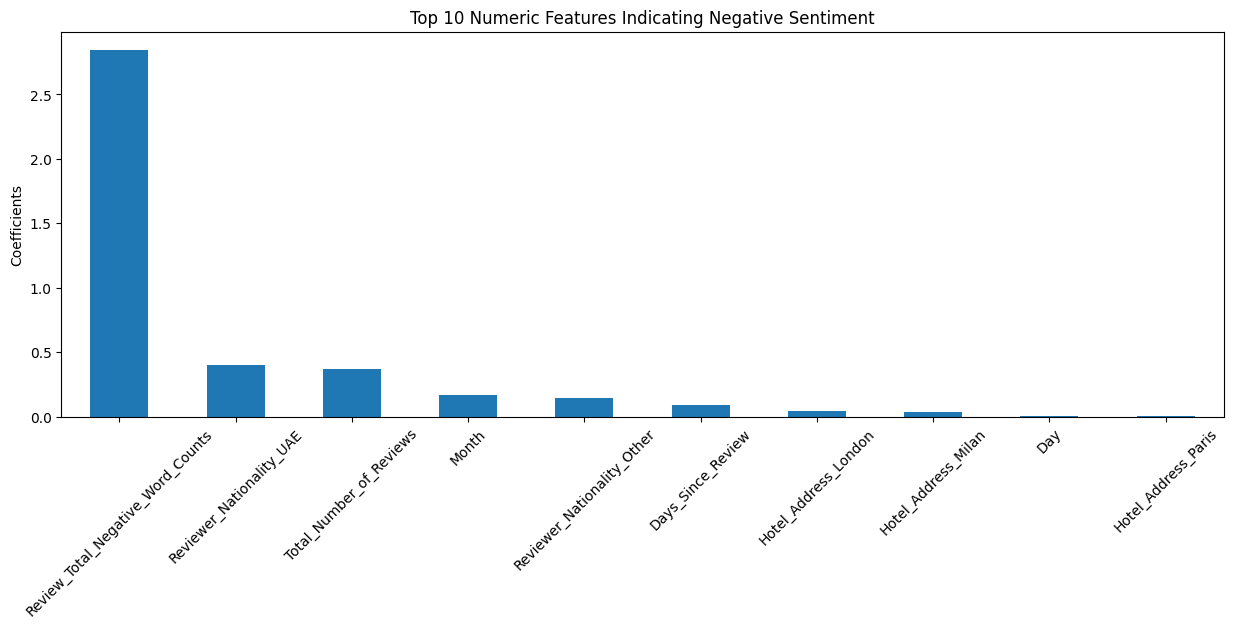

In [371]:
word_counts = pd.DataFrame(
    {"coefficients": neg_logreg_opt.coef_[0][0:26]},
    index=X_train_1.columns
).sort_values("coefficients", ascending=False)

word_counts.head(10).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 10 Numeric Features Indicating Negative Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

### 3.5. Conclusion <a name="conclusion_1"> </a>


1. By using n_grams, stemming, and a tuned C value, the model demonstrated lower accuracy, achieving 78.8% on the training set and 74% on the test set, compared to the initial results.
2. The optimized model revealed an updated list of the Top 20 words contributing to positive reviews. For example, phrases like `excellent staff`, `love staff`, and `great room` appear in the Top 20, providing better insights into the qualities of the stay that visitors appreciated.
4. Similarly, the Top 20 predictors of negative reviews were updated. For example, words like `sleep`, `narrow`, `parking`, and `hours` provide insights into common issues experienced by visitors.

## 4. Modelling With Decision Tree Classifier <a name="modelling_decision"> </a>

Plan:
1. Initial modelling without optimization, using all features.
2. Insights from initail modelling.
2. Optimization.
3. Modeling with optimized parameters as we did with the Logistic Regression models.

### 4.1. Initial Modelling <a name="initial_positive_2"> </a>

We will not be scaling the features because the Decision Tree model does not rely on distance measurements. Instead, it splits the data based on feature thresholds, making the relative scales of the features irrelevant to the model's performance.

In [377]:
from sklearn.tree import DecisionTreeClassifier

In [379]:
dt = DecisionTreeClassifier()

In [380]:
X_train_combined

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11203206 stored elements and shape (412159, 1026)>

In [381]:
# Fit model
start = time.time()
dt.fit(X_train_combined, y_train)

print (time.time()-start)

248.72535109519958


In [382]:
print(f'DT train: {dt.score(X_train_combined, y_train)} DT test:{dt.score(X_test_combined, y_test)}')

DT train: 0.9999975737518773 DT test:0.694730201863354


#### Insights Drawn
1. Decision Tree based model showed `~100%` accuracy on training data and `~69%` on the test data. This is a case of low bias and high variance, a.k.a. `overfitting`.
2. Hyperparameter optimization will be applied to overcome the overfitting.

### 4.2 Model Optimization <a name="optimize_2"> </a>

`Max Depth`, `Min Samples Leaf` and `Criterion` (The function to measure the quality of a split) are selected for hyperparameter optimization. 5 fold cross validation will be applied.

In [383]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Create placeholders for all three steps
pipeline = Pipeline([
    ('model', DecisionTreeClassifier())
])

In [409]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

# Three models, two scalers, two dimensional reducers
# Since each model has different parameter names, they each have to go in a separate dictionary. 


param_grid = [
    {
        'model': [DecisionTreeClassifier()], 
        'model__max_depth': [3, 5, 7, 10, 15],
        'model__min_samples_leaf': [2, 5, 10],
        'model__criterion':['gini','entropy']
    },
]


In [410]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [411]:
start = time.time()

fittedgrid = grid.fit(X_train_combined_opt, y_train)

print(time.time()-start)

/home/aidos/Desktop/Hotel-Review-Analysis/hotel_review/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


410.94484281539917


In [412]:
fittedgrid.best_params_

{'model': DecisionTreeClassifier(),
 'model__criterion': 'gini',
 'model__max_depth': 10,
 'model__min_samples_leaf': 2}

The best hyperparameters of the model are max_depth=`10`, min_sample_leaf = `2`, criterion = `gini`

### 4.3 Fitting With Optimized Hyperparameters <a name="optimize_fitting_2"> </a>

In [414]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=2)

We will the same train and test datasets that were used for the Logistic Classifier model.

In [415]:
dt.fit(X_train_combined_opt, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [416]:
print(f'DT train: {dt.score(X_train_combined_opt, y_train)} DT test:{dt.score(X_test_combined_opt, y_test)}')

DT train: 0.7671820826428636 DT test:0.7411684782608695


### 4.4 Conclusion <a name="conclusion_2"> </a>

DecisionTree extremely overfitted to the training data by showing ~100% accuracy, but `was not able to generalize well with ~69%` at test - `low bias, high variance`. After hyperparameter tuning, models showed better results: `76.7%` train and `74.1%` test accuracy.

Overall, between Logistic Regression and Decision Tree models, **LogisiticRegression model performed better**. This model will be selected for the more in-depth evaluataion in the following paragraph.

## 5. Detailed Evaluation of Logistic Classifier Model <a name="detailed_evaluation"> </a>

Logistc Regression Classifieer `positivei_logreg` was best performing and will futher evaluated here.

In [423]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Get class predictions
y_pred = positive_logreg.predict(test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Negative Review", "Predicted Positive Review"],
    index=["True Negative Review", "True Positive Review"]
)

display(cf_df)

,Predicted Negative Review,Predicted Positive Review
True Negative Review,31919,12378
True Positive Review,9440,49303


<Axes: >

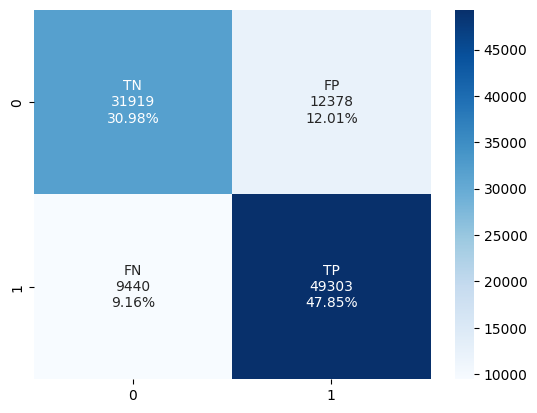

In [424]:
import numpy as np
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Let's interpret these numbers

- **TN:** The majority of data points (31 919) from class 0 (neagative review) were correctly predicted as negative reivews.
- **FP:** There was a less number (12 378) of negative reviews that we incorrectly classified as positive.
- **FN** There was a less number (9440) of positive reviews that were classified as negative.
- **TP** The majority (49303) of positive reivews were classifed correctly.

### 5.1 Precision and Recall <a name="precision_recall"> </a>

Because of the fact that accuracy alone can be misleading, alternative metrics will be considered to find out the relative proportions of correct and incorrect classifications in both the positive and negative classes.

The precision is the probability that  𝑥
  is actually a member of the class. It is a measure of how focused our model is.

On the other hand, recall measures how many members of the positive class the model correctly identified out of the total positives:

We use the F1 score in order to try and maximize the precision and recall scores simultaneously.

In [425]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.77      0.72      0.75     44297
           1       0.80      0.84      0.82     58743

    accuracy                           0.79    103040
   macro avg       0.79      0.78      0.78    103040
weighted avg       0.79      0.79      0.79    103040



**Interpretation:**
- Precision for positive class is slightly higher (77% and 80%).
- Recall for the negative reviews (72%) is lower than positive reviewes (84%), it suggests that the classifier is better at correctly identifying positive reviews than negative ones. A lower recall for negative reviews could indicate that the classifier is more prone to missing negative sentiments, leading to false negatives (i.e., negative reviews being incorrectly classified as positive).


### 5.2 True Positive Rate, False Positive Rate, and ROC <a name="tpr_fpr"> </a>

Now let us consider the question - how do precision and recall behave as we vary the value of the threshold for our classifier? Is there an optimal threshold value to pick to maximize both?

We can vary the value of the threshold, compute values for precision and recall as we iterate over values of the threshold, and compare the results.

In [427]:
# Make probabilistic predictions (scores)
y_proba = positive_logreg.predict_proba(test_scaled)[:,1]

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.799322319677048
Recall score: 0.8393000017023305

Threshold of 0.2:
Precision score: 0.6750841551999055
Recall score: 0.9729840151166947


Having threshold rate lowered to 0.2, would guarantee that the model's FN will be minimal, but there will be a lot of FPs.

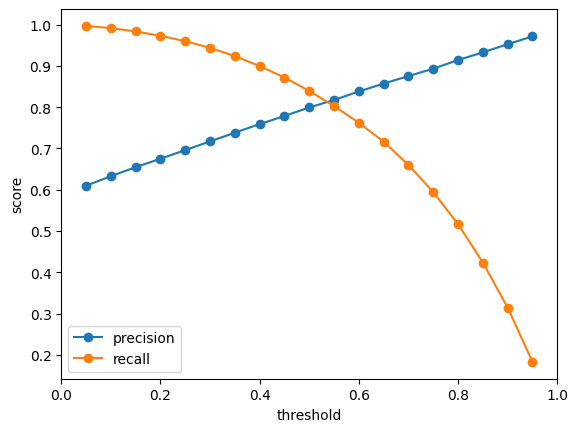

In [428]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)

    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)

    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

If we wanted to maximize both precision and recall in this case, it looks like we could choose a cut-off value of around 0.6. 

The True Positive Rate (TPR) measures what proportion of a model assigned to positive are actually members of the positive class:

In [434]:
y_proba = positive_logreg.predict_proba(test_scaled)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

TPR = recall_score(y_test, y_binary)
print(f"TPR: {TPR}")

TPR: 0.8393000017023305


Basically, it's our Recall.

On the other hand, the False Positive Rate (FPR) will be the proportion of all negatives that we incorrectly identified as positive, that is:

In [435]:
def false_positive_rate(y_true, y_pred):

    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)

    return FPR

In [437]:
y_proba = positive_logreg.predict_proba(test_scaled)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

FPR = false_positive_rate(y_test, y_binary)
print(f"FPR: {FPR}")

FPR: 0.27943201571212495


This means that around 27.9% of the negative instances in the dataset were incorrectly classified as positive by the model.

In [438]:
thresholds = np.linspace(0, 1, 100)


# Iterate over the thresholds and compute the positive and negative recall
true_positive_rates = []
false_positive_rates = []

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:

    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)

    tpr = recall_score(y_test, y_pred)
    fpr = false_positive_rate(y_test, y_pred)

    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

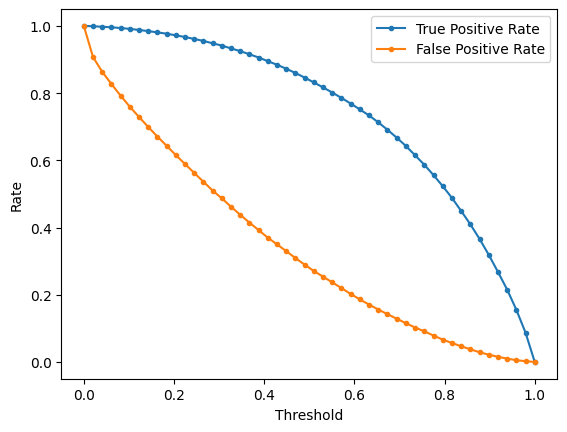

In [439]:
plt.figure()
plt.plot(thresholds, true_positive_rates, label='True Positive Rate', marker='.')
plt.plot(thresholds, false_positive_rates, label='False Positive Rate', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

We see that by increasing probability threhold, we can see that TP and FP rates also drop.

Finally, we plot the Receiver Operating Characteristic, or ROC curve. The ROC is a graphical measure which compares the true positive and false positive rates of a binary model, as defined above.

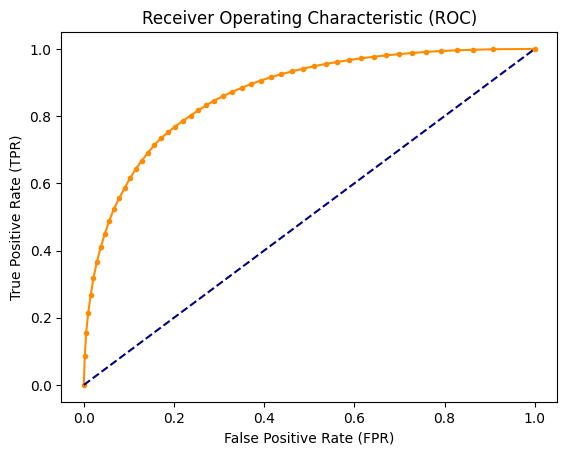

In [440]:
# True positive rate (TPR) = recall
tprs = np.array(true_positive_rates)

# False positive rate (FPR)
fprs = np.array(false_positive_rates)

plt.figure()
plt.plot(fprs, tprs, color='darkorange', marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

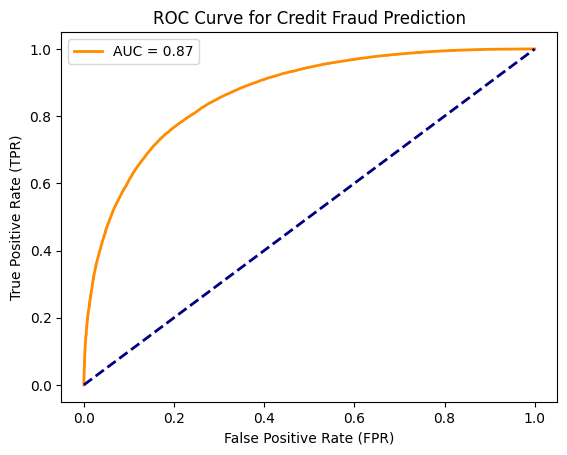

Area under curve (AUC):0.8675638547473861



In [441]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Credit Fraud Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

An AUC value of 0.867 indicates the probability that the model will rank a randomly chosen positive review higher than a randomly chosen negative review. In other words, it measures the model's ability to discriminate between positive and negative classes.

## 6. Conclusion and Recommendations <a name="recommendations"> </a>

1. The selected model was relatively efficient and got `78.8%` accuracy.
2. The model has a good ability to distinguish between positive and negative reviews, as indicated by an AUC score of `86.7%`. The hotel management can rely on the positive reviews for their decision making.
3. If the management wants to identify negative words or sequence of words that will indicate negative sentiment, the negative reviews should considered seperately from the positive reviews. The model gets consfused seeing sequence of positive words as one feature, then sequence of negative words as another feature. Reviewers tend to provide balanced review for the negative sentiment, but more positive review for the positive sentiment.
4. Analysis revealed the top 20 positive words and they can be trusted by the management. However, majority of the predictors are adjectives and can not be used for the actionable insights. We tried to use `n-grams` and `stemming` to find out more tokens with 2 or 3 words and gained more meaninghul indicators. `More sophisticated vectorization approaches might help to get better results.`
5. `Average Score` is the best indicator of the review sentiment. So, the management should rely on the metric and continue to do effort to get higher average score from their guests, and analyze and work on reivews with lower average score. 